<a href="https://colab.research.google.com/github/SandKrish/Classification_Prediction/blob/main/Binary_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Traning, test files and Libraries

## Importing Training and Test Files

In [1]:
#The following code snippet is used to upload a file from the local drive to Colab
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_set.csv to test_set.csv
Saving training_set.csv to training_set.csv
User uploaded file "test_set.csv" with length 173602 bytes
User uploaded file "training_set.csv" with length 996302 bytes


## Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Training and Test Data with Pandas 

In [3]:
df = pd.read_csv('training_set.csv')
df_test = pd.read_csv('test_set.csv')

# Initial Analysis of Traning and Test Data 

In [4]:
df.head(2)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.0,0.00,4.34,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.0,0.000,1.200,2,12,0
1,1,0.0,0.56,0.56,0.0,1.12,0.56,2.25,0.0,0.0,0.56,0.0,0.56,0.0,0.0,0.0,0.0,0.0,0.56,3.38,0.0,1.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.0,0.083,16.304,148,375,1


In [5]:
df_test.head(2)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.7,0.0,0.70,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2.83,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.0,2.342,47,89
1,1,0.0,0.0,0.84,0.0,0.84,0.0,0.84,0.0,0.0,0.0,0.0,0.0,0.84,0.0,0.0,0.0,0.0,0.0,2.54,0.0,1.69,0.0,0.0,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.0,10.375,168,249


Traning and test data is having first column "Unnamed: 0" which is the having the index details, so we can set it as index.

In [6]:
df.set_index('Unnamed: 0', inplace=True)
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.00,4.34,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.0,0.000,1.200,2,12,0
1,0.0,0.56,0.56,0.0,1.12,0.56,2.25,0.0,0.0,0.56,0.0,0.56,0.0,0.0,0.0,0.0,0.0,0.56,3.38,0.0,1.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.0,0.083,16.304,148,375,1


In [7]:
df_test.set_index('Unnamed: 0', inplace=True)
df_test.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.7,0.0,0.70,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2.83,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.0,2.342,47,89
1,0.0,0.0,0.84,0.0,0.84,0.0,0.84,0.0,0.0,0.0,0.0,0.0,0.84,0.0,0.0,0.0,0.0,0.0,2.54,0.0,1.69,0.0,0.0,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.0,10.375,168,249


In [8]:
print("Number of rows in Training set is = ", df.shape[0], " \nNumber of columns in Training set is = " , df.shape[1]) 

Number of rows in Training set is =  3910  
Number of columns in Training set is =  58


In [9]:
print("Number of rows in Test set is = ", df_test.shape[0], " \nNumber of columns in Test set is = " , df_test.shape[1]) 

Number of rows in Test set is =  691  
Number of columns in Test set is =  57


## Null Value Analysis 

In [10]:
df.isnull().sum().sum()

0

In [11]:
df_test.isnull().sum().sum()

0

There is no null value in both training and test set.

# EDA of Training Set

## Statistical Analysis

In [12]:
df.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
X1,3910.000000,0.102990,0.296322,0.000000,0.000000,0.000000,0.000000,4.340000
X2,3910.000000,0.206419,1.253828,0.000000,0.000000,0.000000,0.000000,14.280000
X3,3910.000000,0.284419,0.504352,0.000000,0.000000,0.000000,0.430000,4.540000
X4,3910.000000,0.062074,1.369361,0.000000,0.000000,0.000000,0.000000,42.810000
X5,3910.000000,0.311309,0.656195,0.000000,0.000000,0.000000,0.387500,9.090000
X6,3910.000000,0.095974,0.261455,0.000000,0.000000,0.000000,0.000000,3.570000
X7,3910.000000,0.112320,0.389516,0.000000,0.000000,0.000000,0.000000,7.270000
X8,3910.000000,0.106041,0.398694,0.000000,0.000000,0.000000,0.000000,11.110000
X9,3910.000000,0.091146,0.271417,0.000000,0.000000,0.000000,0.000000,3.230000
X10,3910.000000,0.244345,0.667065,0.000000,0.000000,0.000000,0.170000,18.180000


Apart from X55, X56 and X57 all features are having minimum value as 0 and for these 3 it is 1.

X19 is having a mean of 1, other than that till X55 all are having mean near to zero but maximum value are little far from zero for many features even though we have a count of 3910. Also 25% (lower percentile ) is zero till X55 and upper percentile 75%, is also near to zero till X55 excluding X19 and X21. This clearly points to outliers present, which we can analyze further.

X55, X56 and X57 is having mean very less than maximum value and also lower and upper percentile indicates exsistence of outliers

## Correlation Analysis

### Heat Map for correlation

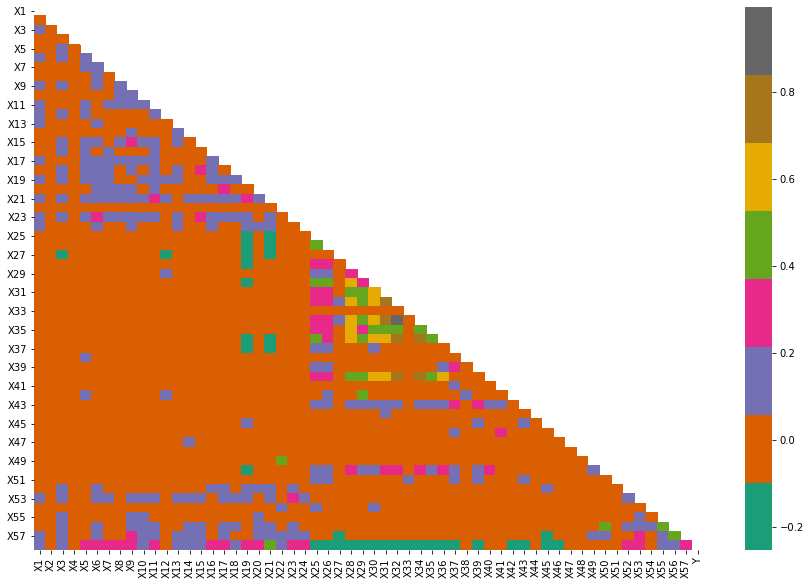

In [13]:
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, cmap='Dark2');

As there are too many features rather than a heat map we can go print the correlation value.

In [14]:
correlation = (pd.DataFrame(df.corr().Y))
correlation.sort_values(by='Y', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Y
Y,1.000000
X21,0.393099
X23,0.338913
X7,0.327233
X53,0.317384
X19,0.283936
X57,0.270421
X17,0.269190
X16,0.264826
X9,0.254297


Features are either negatively or positively coorelated with target.

## Analysis of Target

In [15]:
df['Y'].nunique()

2

In [16]:
df['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

There are two classes target belong to that is 0 and 1.

## Visualization of Target

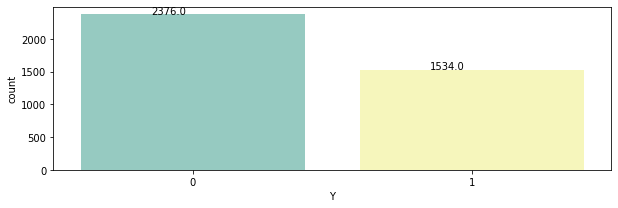

In [17]:
plt.figure(figsize=(10, 3))
ax = sns.countplot(x =df['Y'],data=df, palette="Set3")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

## Analysis of Features

For analysis of features, I am assigning all features to X and target to Y.

In [18]:
X = df.drop(['Y'],axis = 1)
y = df['Y']

In [19]:
for col in df.columns:
  print(df[col].value_counts())

0.00    3017
0.10      44
0.09      37
0.17      34
0.08      28
        ... 
2.85       1
1.88       1
0.61       1
1.31       1
1.01       1
Name: X1, Length: 136, dtype: int64
0.00     3146
14.28      28
0.10       23
0.08       22
0.19       21
         ... 
0.74        1
3.52        1
1.22        1
0.61        1
1.38        1
Name: X2, Length: 160, dtype: int64
0.00    2289
0.32      45
0.29      38
0.55      33
0.71      27
        ... 
1.79       1
1.60       1
2.06       1
1.46       1
1.40       1
Name: X3, Length: 207, dtype: int64
0.00     3871
0.58        2
0.17        2
0.42        2
1.26        1
0.19        1
35.46       1
0.49        1
0.31        1
1.35        1
0.91        1
7.18        1
7.07        1
0.60        1
0.44        1
1.91        1
0.57        1
0.14        1
0.95        1
0.55        1
0.11        1
1.16        1
0.81        1
0.16        1
40.13       1
0.87        1
42.73       1
19.73       1
13.63       1
5.03        1
0.10        1
42.81       1
4.31

There are quite few unique values for each features, so we can visualize and check them.

## Visualization of Features

We are having 57 features, so we can visualize all using histogram first and see what data says.

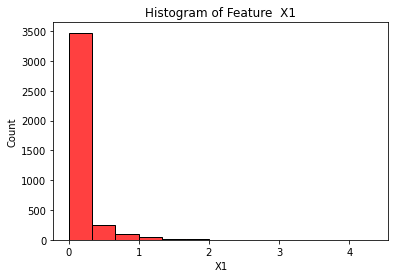

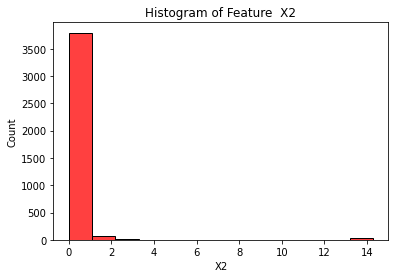

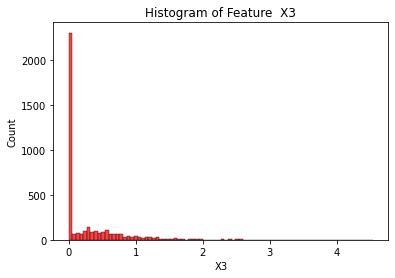

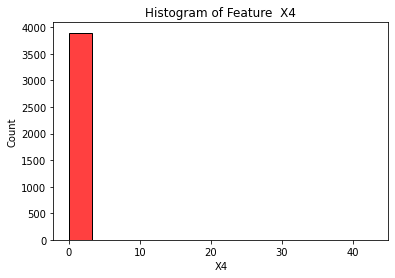

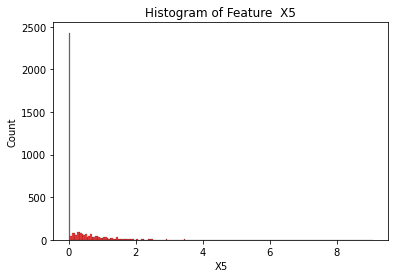

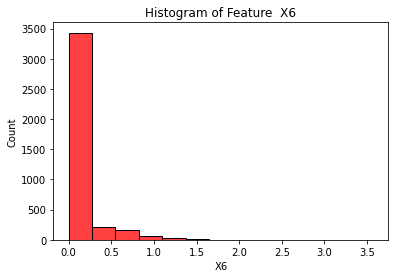

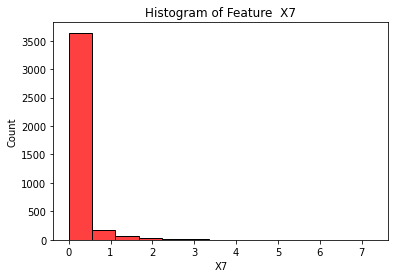

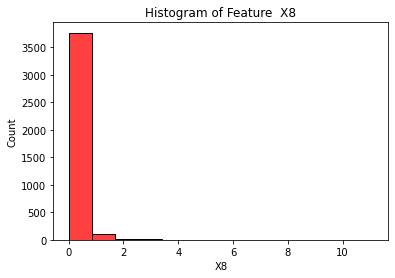

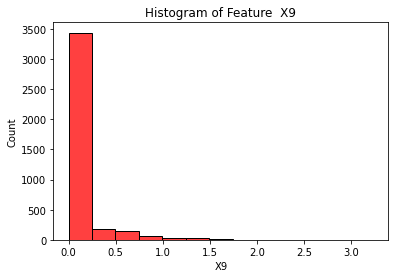

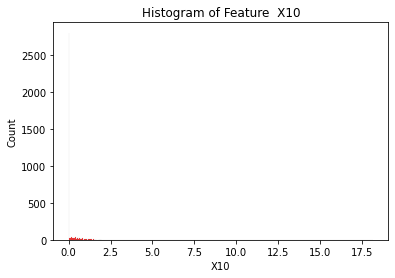

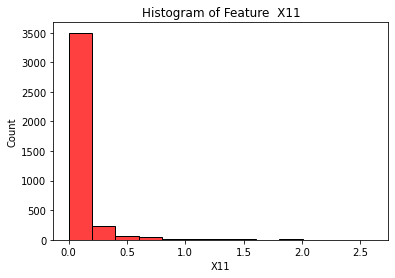

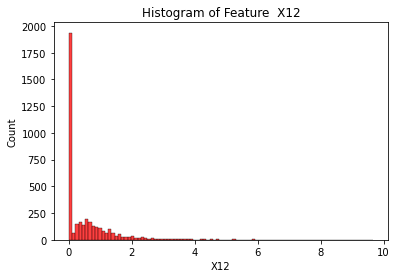

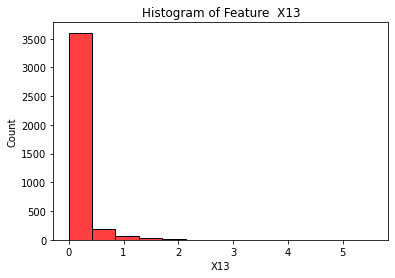

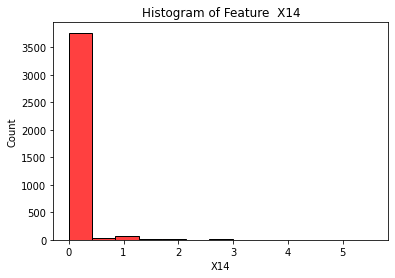

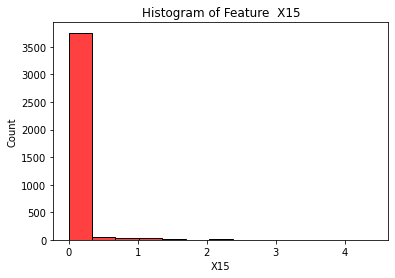

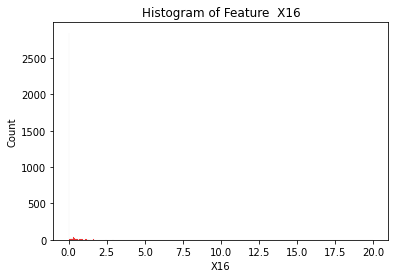

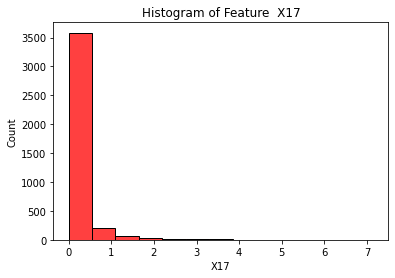

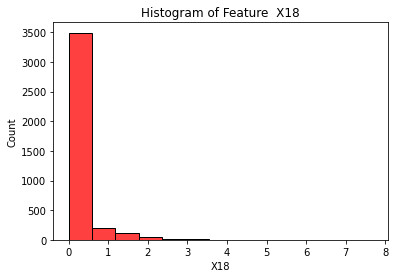

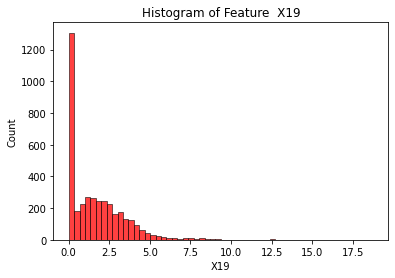

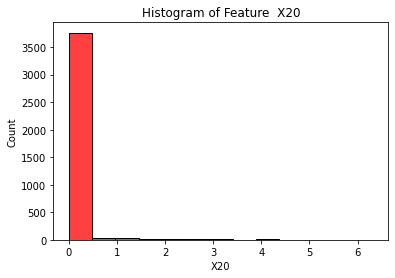

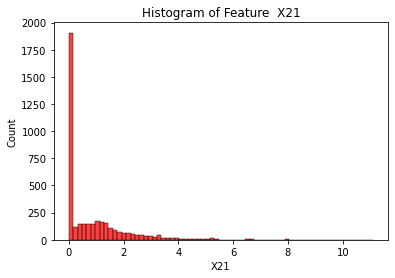

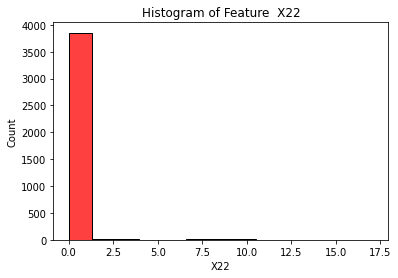

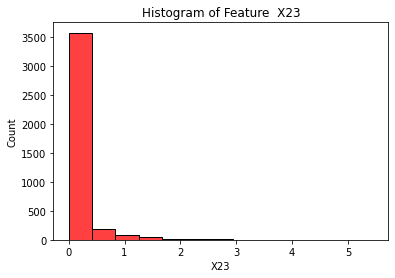

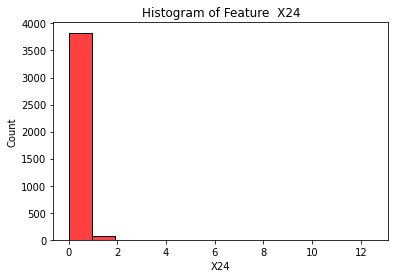

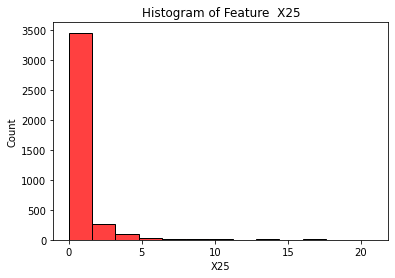

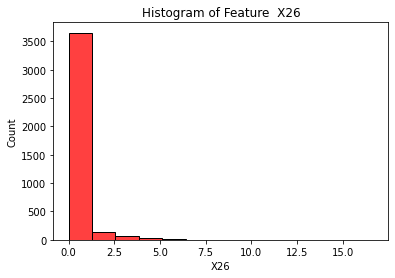

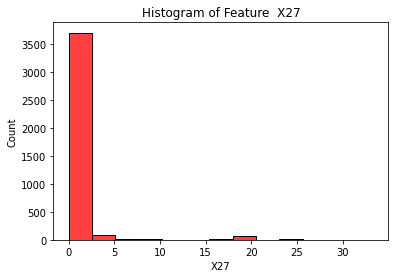

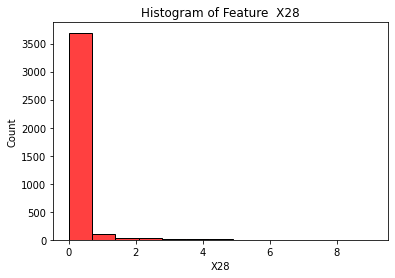

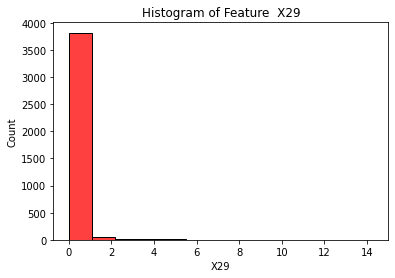

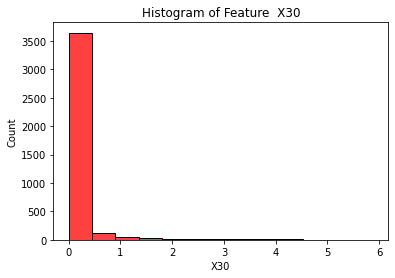

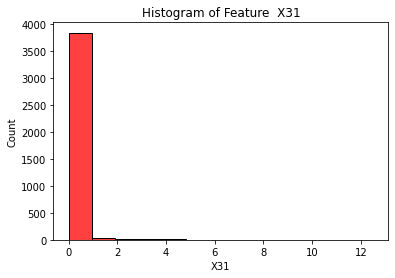

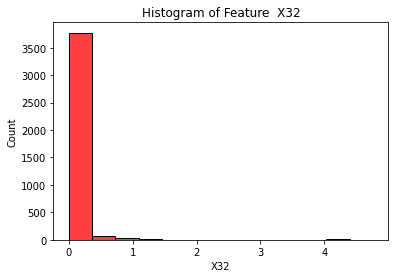

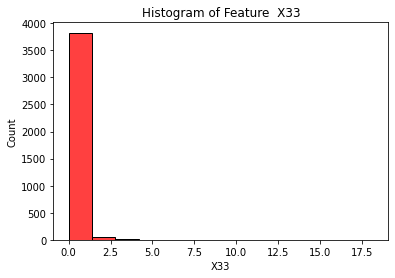

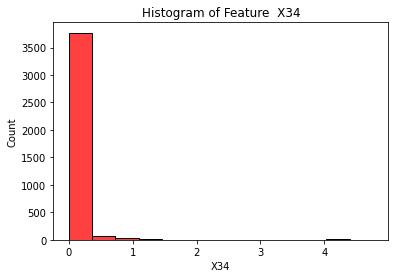

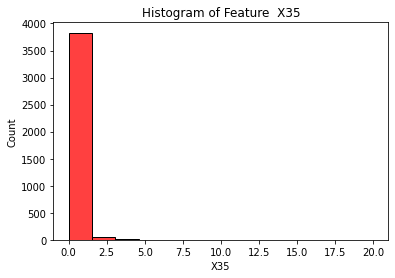

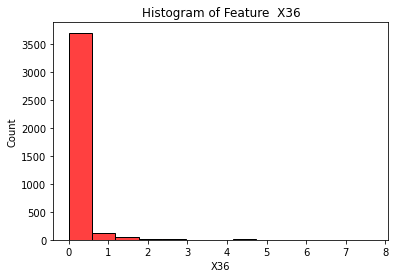

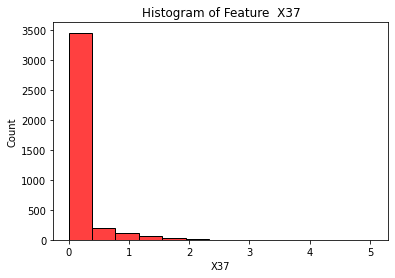

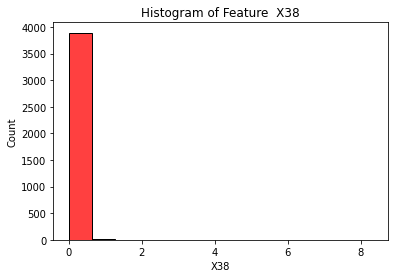

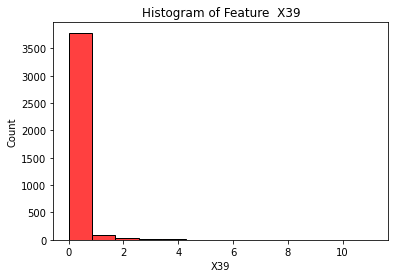

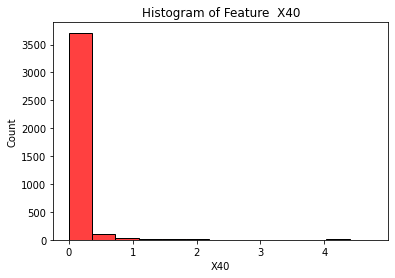

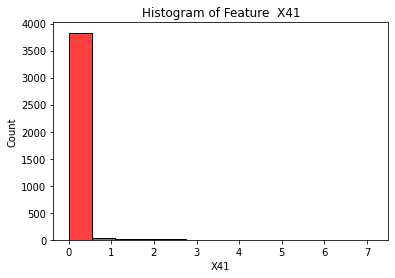

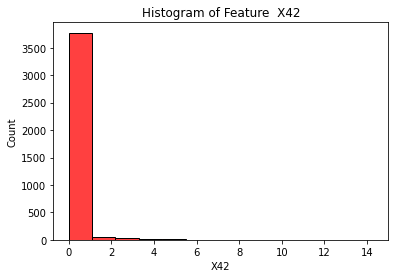

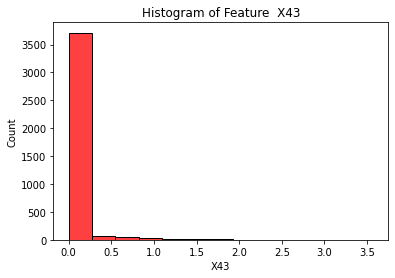

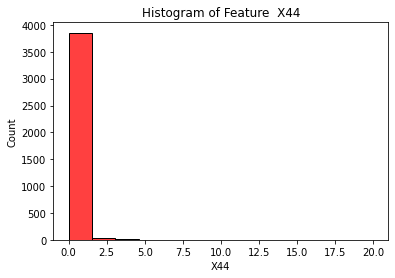

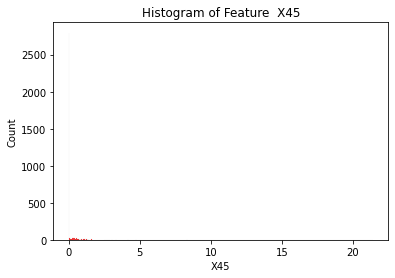

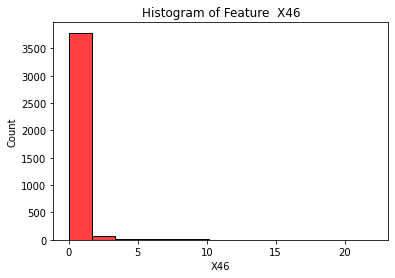

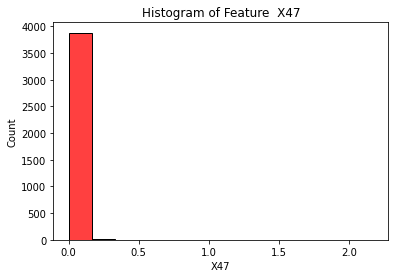

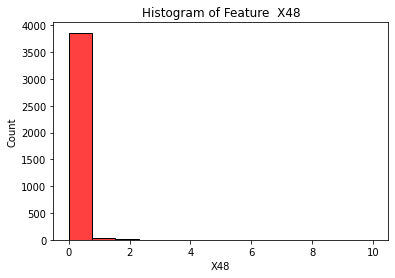

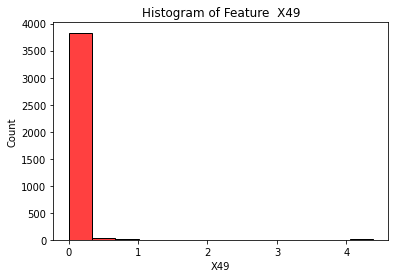

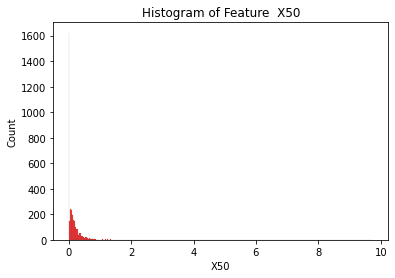

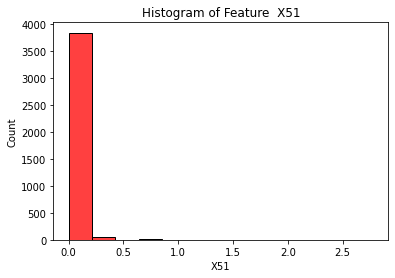

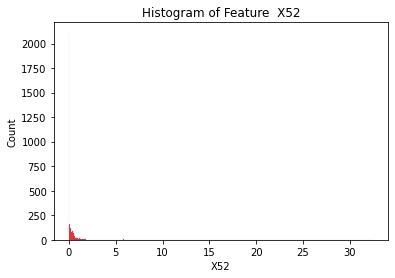

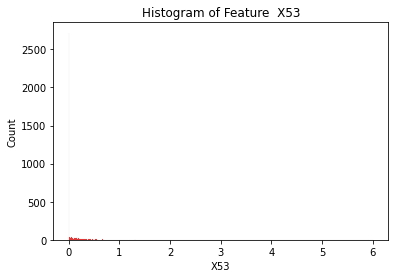

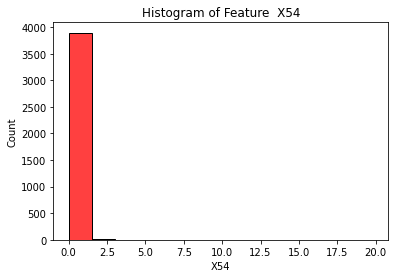

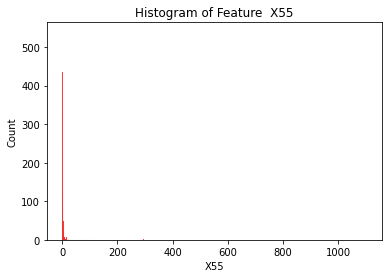

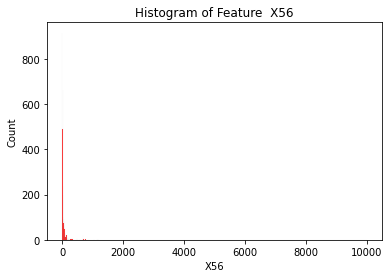

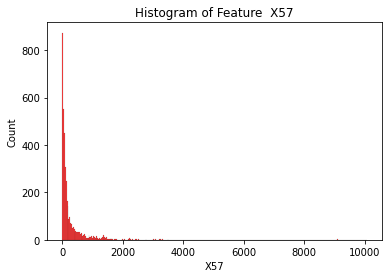

In [20]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0}) # As there are too many visualisation, will get a warning, which can be temporarily suspended by using this

for i, col in enumerate(X.columns):
    plt.figure(i)
    sns.histplot(X[col],color = 'red')
    My_Title = "Histogram of Feature  " + X.columns[i]
    plt.title(My_Title)
    plt.show()
  

Insight : - 


*   Histogram points to outliers.
*   Features X5, X10, X16, X22, X45, X52,X53, X55, X56 and X57 visualisation using histogram is not clear, we have go for some other visualisation.


Outlier: -

An outlier is an observation that diverges from well-structured data  may occur due to the variability in the data, or due to experimental error or human error during data entry.

It can detected:-

1.  By visualising Box plot or Boxen plot 
2.  Z-score 
3.  Modified Z-score method
4.  IQR method

For visualisation we can use a boxen plot for visualisation as we doubt there are lots of outliers.Boxen plot provides more information about the shape of the distribution, particularly in the tails. The outliers here is shown by 🔹 shape.

The Z-score, or standard score, describes data in terms of mean and standard deviation. Taking a Z-score is simply mapping the data onto a distribution whose mean is defined as 0 and whose standard deviation is defined as 1. But as it relay on mean and std it is highly affected by outliers.

Modified Z-score method : It overcomes the Z-score method as it uses the median and MAD[Mean Absolute Deviation] rather than the mean and standard deviation. The median and MAD are robust measures of central tendency and dispersion, respectively.

IQR: Interquartile range is a robust method for detecting outlier. Here data is divided intofour groups of equal size. The box represents the 1st and 3rd quartiles, which are equal to the 25th and 75th percentiles.


So first we can visualise the features using Boxen plot




## Visualusation of features using Boxen Plot

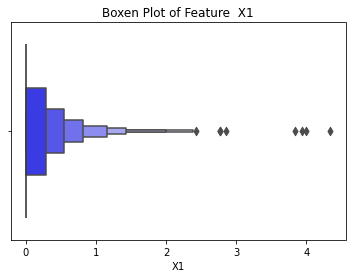

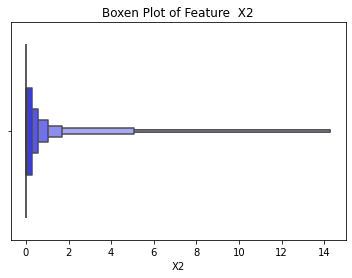

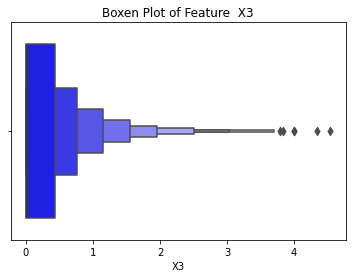

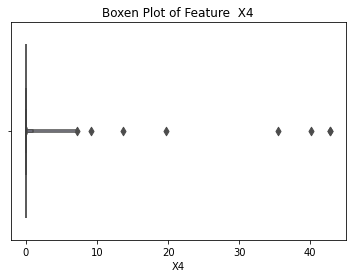

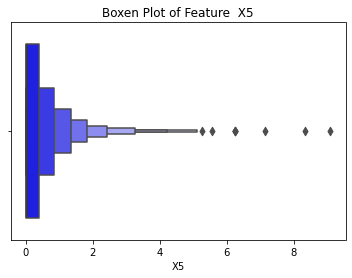

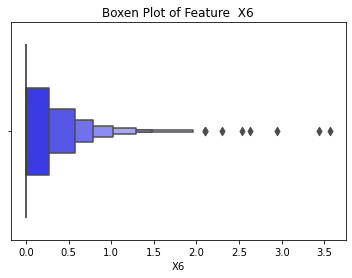

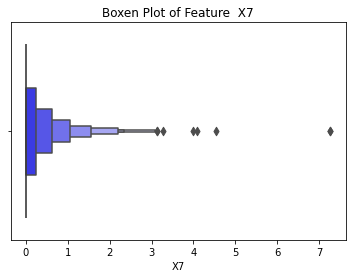

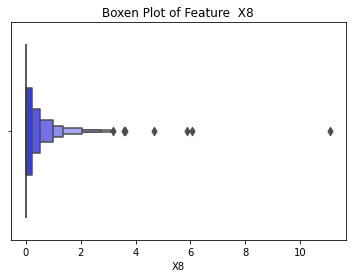

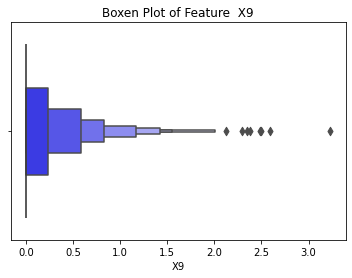

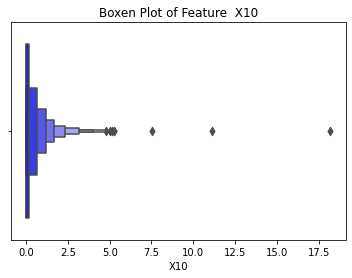

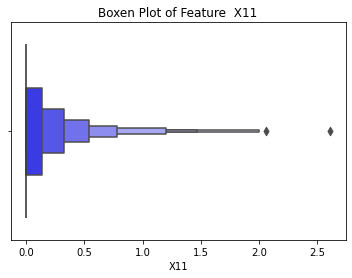

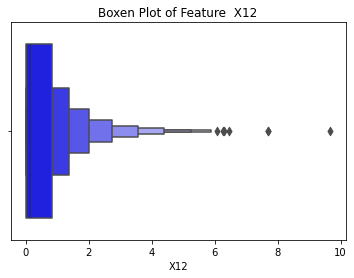

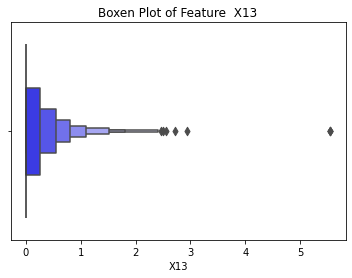

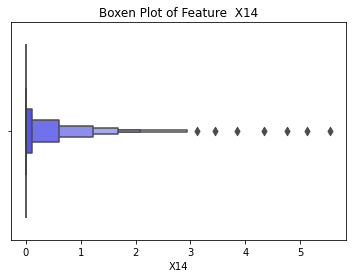

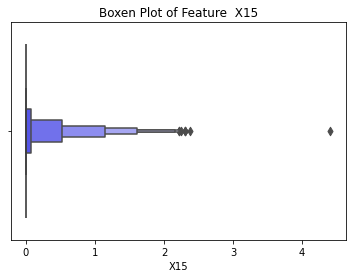

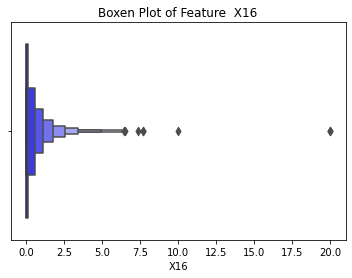

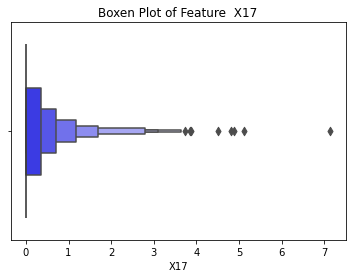

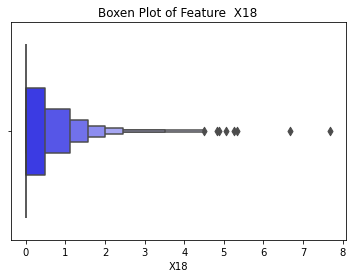

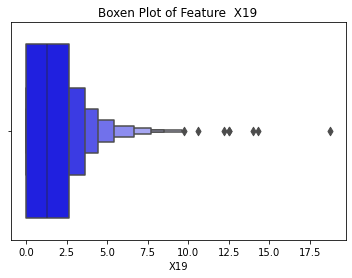

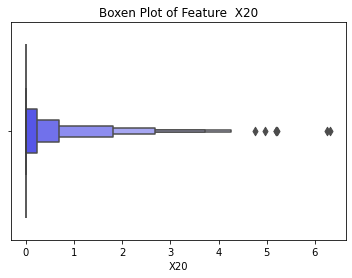

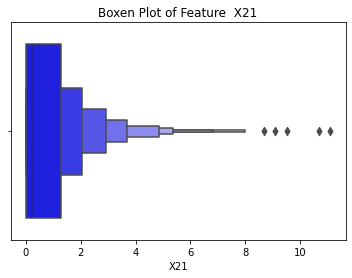

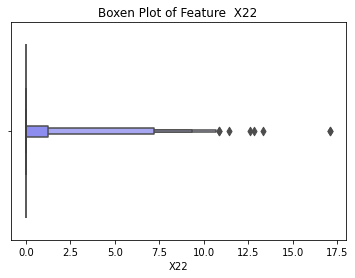

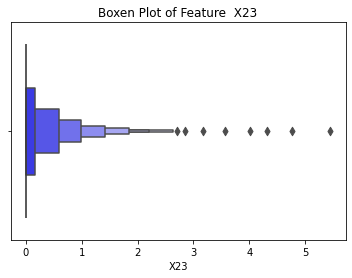

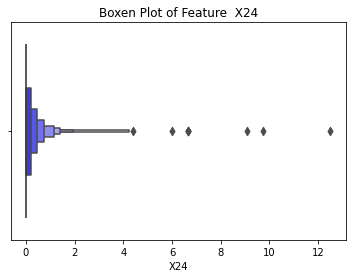

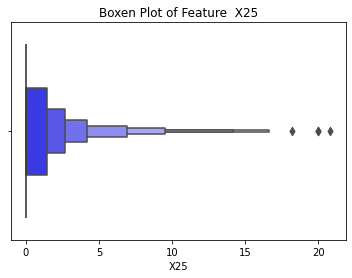

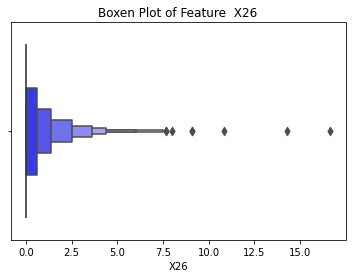

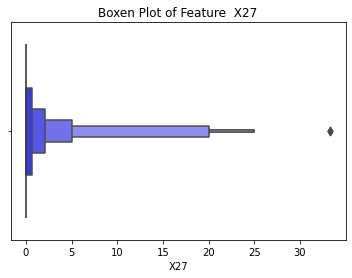

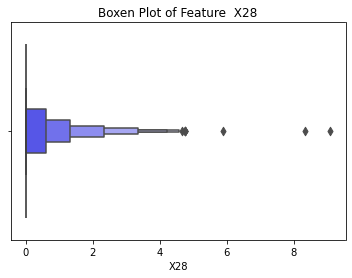

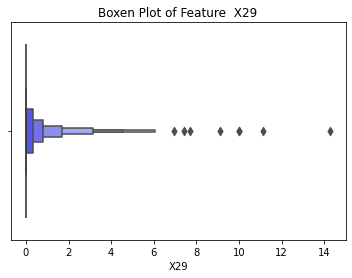

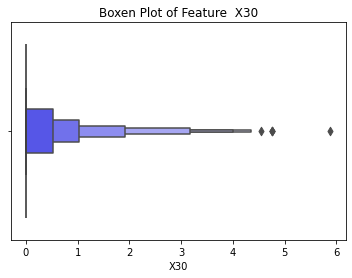

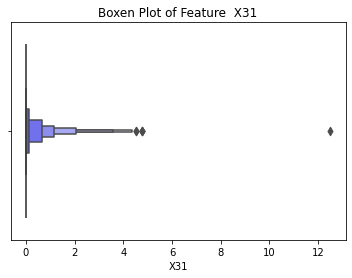

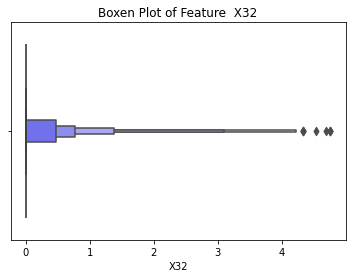

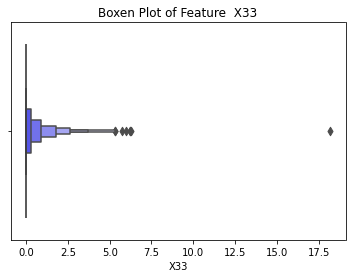

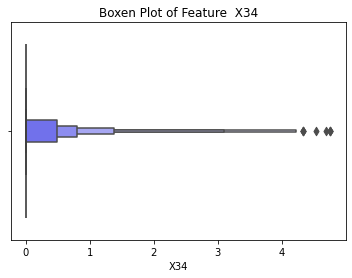

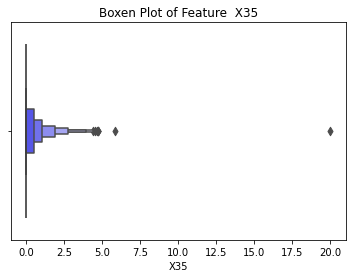

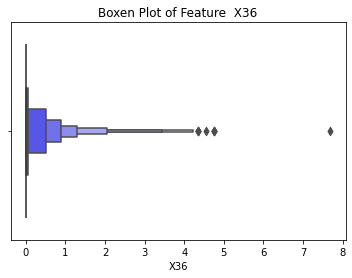

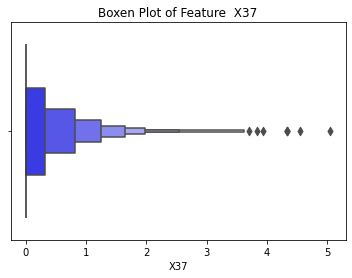

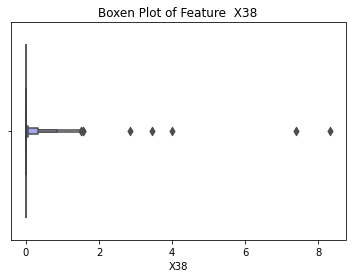

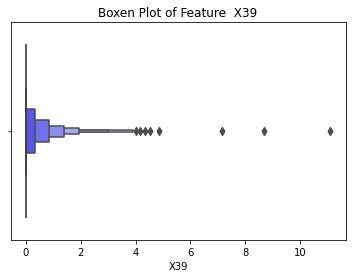

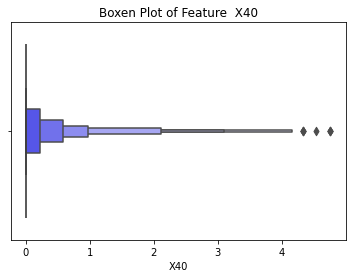

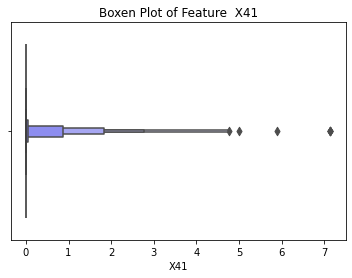

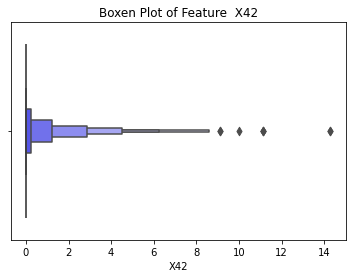

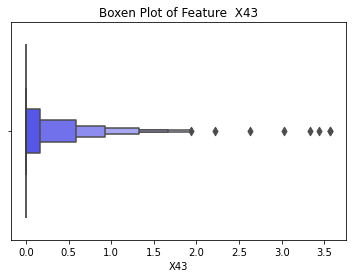

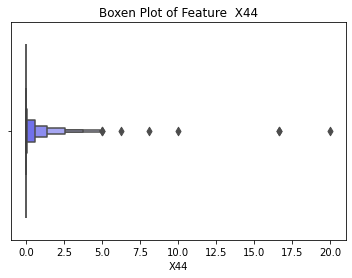

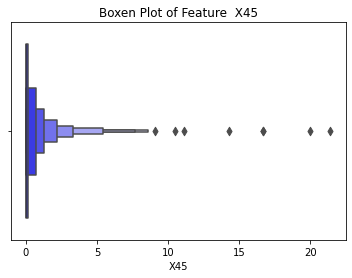

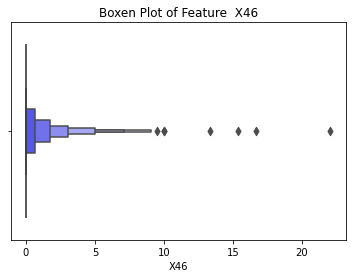

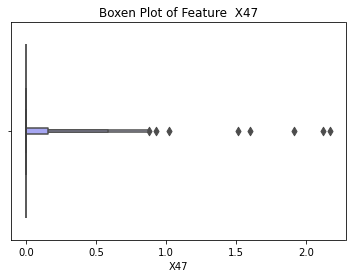

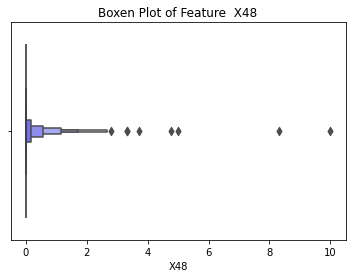

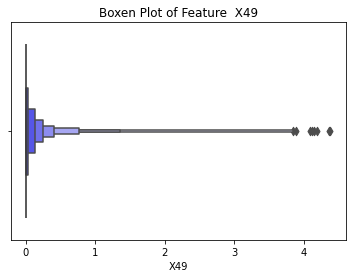

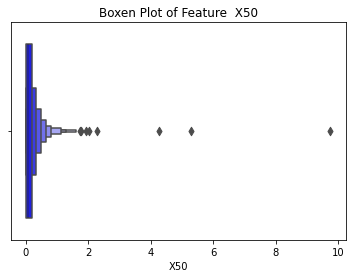

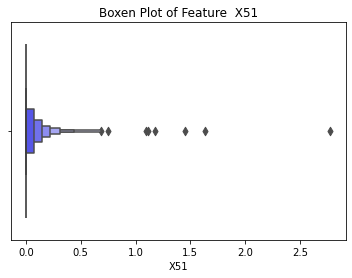

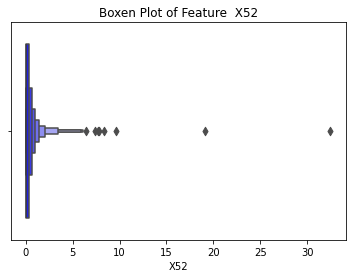

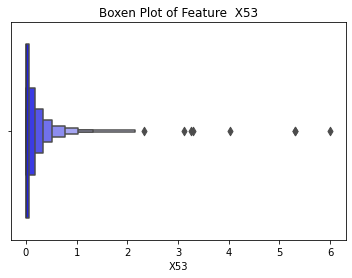

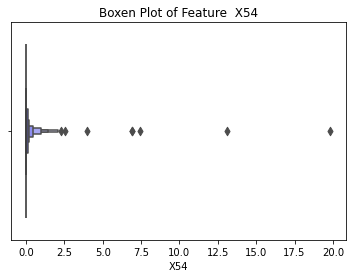

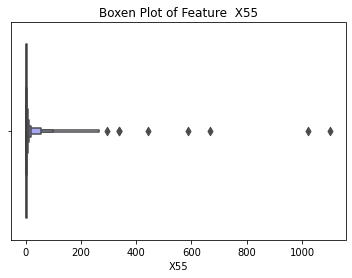

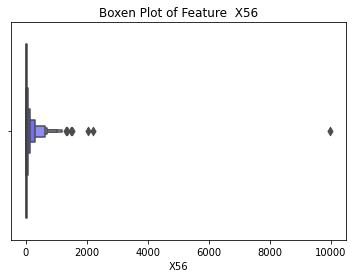

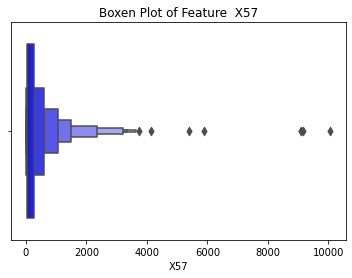

In [21]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

for i, col in enumerate(X.columns):
    plt.figure(i)
    My_Title = "Boxen Plot of Feature  " + X.columns[i]
    sns.boxenplot(x= X[col],color ='blue')
    plt.title(My_Title)
    plt.show()

## Outliers detection using IQR method

We can check number of outliers using IQR method.

In [22]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    arr = np.where((ys > upper_bound) | (ys < lower_bound))
    length = np.array(arr).size
    return length

In [23]:
for i, col in enumerate(X.columns):
    len_col = outliers_iqr(X[col])
    output = "Number of Outliers in Feature  " + X.columns[i] + " is : " 
    print(output, len_col,'\n')

Number of Outliers in Feature  X1 is :  893 

Number of Outliers in Feature  X2 is :  764 

Number of Outliers in Feature  X3 is :  282 

Number of Outliers in Feature  X4 is :  39 

Number of Outliers in Feature  X5 is :  419 

Number of Outliers in Feature  X6 is :  860 

Number of Outliers in Feature  X7 is :  684 

Number of Outliers in Feature  X8 is :  715 

Number of Outliers in Feature  X9 is :  663 

Number of Outliers in Feature  X10 is :  715 

Number of Outliers in Feature  X11 is :  608 

Number of Outliers in Feature  X12 is :  233 

Number of Outliers in Feature  X13 is :  727 

Number of Outliers in Feature  X14 is :  307 

Number of Outliers in Feature  X15 is :  282 

Number of Outliers in Feature  X16 is :  796 

Number of Outliers in Feature  X17 is :  824 

Number of Outliers in Feature  X18 is :  884 

Number of Outliers in Feature  X19 is :  65 

Number of Outliers in Feature  X20 is :  364 

Number of Outliers in Feature  X21 is :  201 

Number of Outliers in Fe

So there are many outliers in the dataset. We cannot get delete the outliers as a whole, because we does not have a full understanding of the feature details. 

For example, if a customer buys a lot of shopping which costs lakh, he is a prestigeous customer, so deleting such customer will be a wrong decision. So without knowing full details about data, we cannot delete the outliers.

So here we can go for Robust Scaler for feature scaling, as it scale the features using statistics that are robust to outliers.This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

# Splitting Tranining set into training and Validation set




As per problem statement we have split the training set into traning and validation set in the ratio of 4:1.

i.e., training set will be 4/5 and validation 1/5

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

Feature Scaling is scaling all your features to make sure they all take values on the same scale. It prevents one feature to dominate over the other. Feature Scaling is done after we split the dataset into the training set and test set(here valdiation set) and it is applied to the training set.

For feature scaling, we use the fit_transform() method for the training set and the transform() method for the valdiation set here.

fit_transform() : - It is applied only for training set. It contain two methods fit() and transform(). Fit() will do all the mathematical calculation and will get the mean and standard deviation of the data. So it is only done to training set, as we donot want valdiation data and later on test data values to be known by the model. As we consider test data as real data or live data. transform() method will apply the calculated values to the dataset or it transforms the data to fit the model.

transform() :- The transform() method applied to valdiation set  here and valdiation data are transformed or scaled using the model parameters that were learned on applying the fit method to the training dataset.

In [25]:
cols = X_train.columns

In [26]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train = pd.DataFrame(X_train,columns=cols)
X_val = pd.DataFrame(X_val,columns=cols)

# Model Creation using ML

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Logistic Regression

In [28]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [29]:
y_pred_lr = lr_model.predict(X_val)

### Confusion Matrix

Confusion matrix is used for summarizing the performance of a classification algorithm. It contains :

*   True Positive : Positive outcome is correctly predicted as positive.
*   True Negative : Negative outcome is correctly predicted as negative.
*   False Positive: Negative outcome is wrongly predicted as positive.
*   False Negative: Positive outcome is wrongly predicted as negative.

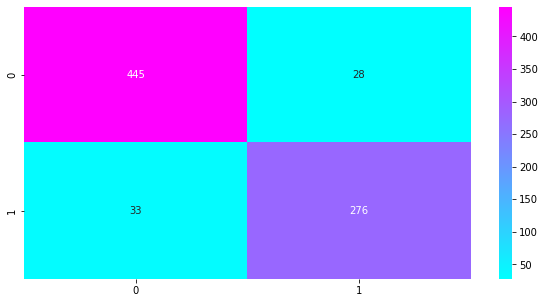

In [30]:
plt.figure(figsize=(10, 5))
confusion_matrix = confusion_matrix(y_val,y_pred_lr)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='cool')
plt.show()

### Accuracy, Precision and Recall

Accuracy : It is correctly predicted outcome to total outcomes.

*   Accuracy = (TP+TN)/(TP+FP+FN+TN)

Precision : It tells us if we have predicted a positive outcome, how much we are sure it will be true positive. In mathematicaly we can say, it is the proportion of true positive on all positives predictions.

*    Precision = TP/(TP+FP)

Recall : It is the proportion of true positives on all actual positive elements. Recall is also known as true positive rate.

*   Recall = TP/(TP+FN)

In [31]:
from sklearn import metrics

In [32]:
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(y_val, y_pred_lr)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(y_val, y_pred_lr)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_val, y_pred_lr)))

Accuracy of Logistic Regression model is  :  0.921994884910486
Recall of Logistic Regression model is    :  0.8932038834951457
Precision of Logistic Regression model is :  0.9078947368421053


### Classification Report

A classification report is a performance evaluation metric in machine learning.

F1 is the weighted harmonic mean of the precision and Recall.

*   F1 Score = 2(Recall * Precision) / (Recall + Precision)


In [33]:
print(classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       473
           1       0.91      0.89      0.90       309

    accuracy                           0.92       782
   macro avg       0.92      0.92      0.92       782
weighted avg       0.92      0.92      0.92       782



## Random Forest

In [34]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 52,oob_score=True)
rfc.fit(X_train.values, y_train.values)

y_pred_rfc = rfc.predict(X_val.values)

accuracy_score(y_val,y_pred_rfc)

0.9539641943734015

oob_score : This is the accuracy whilst evaluating our instances in the training set using only the trees for which they were omitted.

In [35]:
rfc.oob_score_

0.9517263427109974

Training Score

In [36]:
print('Score: ', rfc.score(X_train.values, y_train.values))

Score:  0.9993606138107417


Validation Score

In [37]:
print('Score: ', rfc.score(X_val.values, y_val.values))

Score:  0.9539641943734015


We see that the accuracy measured by oob is very similar to that obtained with the validation set. It thus follows through the theory that the oob accuracy is a better metric by which to evaluate the performance of your model rather than just the score. 

This is a consequence of bagging models and cannot be done with other types of classifiers.

### Confusion Matrix

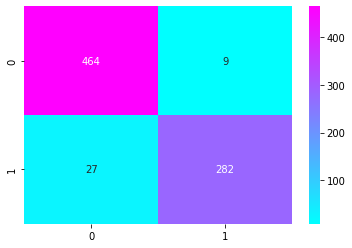

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.show()

### Classification Report

In [39]:
print(classification_report(y_val, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       473
           1       0.97      0.91      0.94       309

    accuracy                           0.95       782
   macro avg       0.96      0.95      0.95       782
weighted avg       0.95      0.95      0.95       782



## Plotting Feature Importance

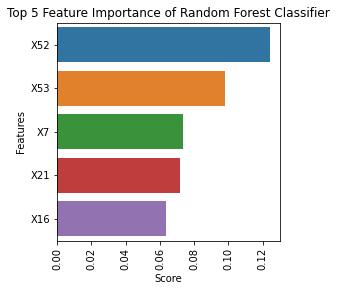

In [40]:
fig = plt.figure(figsize=(4,4))

rfc =  RandomForestClassifier(n_estimators=100, random_state=52)
pred =rfc.fit(X_train, y_train).predict(X_val)

dn = {'features':X.columns, 'score':rfc.feature_importances_}
df_ran = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
df1 = df_ran.head()
plot = sns.barplot(x='score', y='features', data=df1, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Top 5 Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

X52 is the most significant feature.

## To Find Best Number of Estimators for RF

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


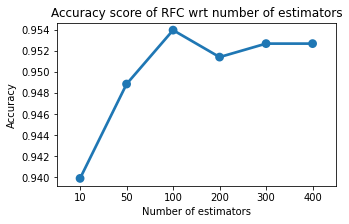

In [41]:
fig = plt.figure(figsize=(5,3))

score = []
est = []
estimators = [10, 50, 100, 200, 300,400]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52,oob_score = True)
    pred1 = rfc1.fit(X_train.values, y_train.values).predict(X_val.values)
    accuracy = accuracy_score(y_val, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 

         title='Accuracy score of RFC wrt number of estimators')
plt.show()

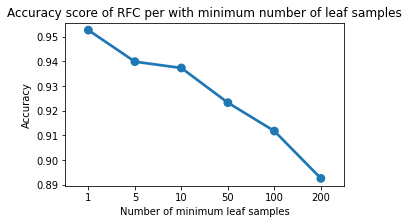

In [42]:
fig = plt.figure(figsize=(5,3))
score = []
leaf = []
leaf_options = [1, 5, 10, 50, 100, 200]
for l in leaf_options:
    rfc2 = RandomForestClassifier(n_estimators=400, random_state=52, min_samples_leaf=l)
    pred2 = rfc2.fit(X_train.values, y_train.values).predict(X_val.values)
    accuracy = accuracy_score(y_val, pred2)
    score.append(accuracy)
    leaf.append(l)
plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', 
         title='Accuracy score of RFC per with minimum number of leaf samples')
plt.show()

The number of leaf is one, so the parameters we have used is best for RF.

# Model creation with Neural Network

### Model with ANN

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense,  LSTM , Dropout
from tensorflow.keras.utils import plot_model 

In [44]:
l = X_train.shape[1]

In [45]:
model = Sequential()

model.add(Dense(units=l, activation='relu', input_shape = (l,)))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [46]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [48]:
history = model.fit(X_train,y_train, batch_size=32, epochs=10, validation_data=(X_val,y_val), callbacks=[es_callback])

Epoch 1/10
98/98 [==============================] - 3s 20ms/step - loss: 0.4434 - accuracy: 0.8334 - val_loss: 0.3070 - val_accuracy: 0.8990
Epoch 2/10
98/98 [==============================] - 2s 17ms/step - loss: 0.2844 - accuracy: 0.8971 - val_loss: 0.2693 - val_accuracy: 0.8862
Epoch 3/10
98/98 [==============================] - 2s 17ms/step - loss: 0.2689 - accuracy: 0.9095 - val_loss: 0.2188 - val_accuracy: 0.9156
Epoch 4/10
98/98 [==============================] - 2s 17ms/step - loss: 0.2140 - accuracy: 0.9258 - val_loss: 0.2016 - val_accuracy: 0.9258
Epoch 5/10
98/98 [==============================] - 2s 17ms/step - loss: 0.1976 - accuracy: 0.9313 - val_loss: 0.1907 - val_accuracy: 0.9271
Epoch 6/10
98/98 [==============================] - 2s 17ms/step - loss: 0.1975 - accuracy: 0.9364 - val_loss: 0.1917 - val_accuracy: 0.9322
Epoch 7/10
98/98 [==============================] - 2s 17ms/step - loss: 0.1911 - accuracy: 0.9361 - val_loss: 0.1713 - val_accuracy: 0.9373
Epoch 8/10
98

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 57)                3306      
                                                                 
 dropout (Dropout)           (None, 57)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               7424      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               2

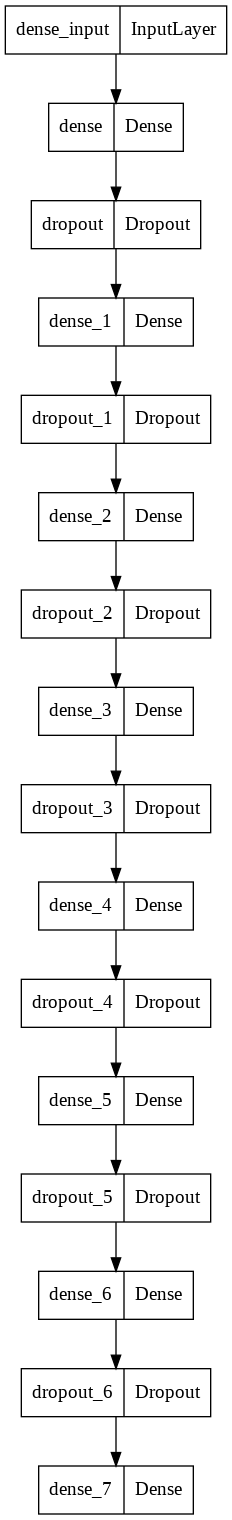

In [50]:
plot_model(model, to_file='model.png')

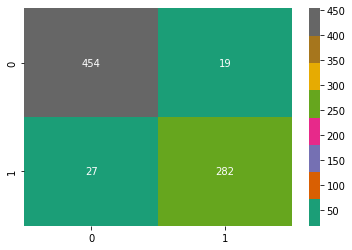

In [51]:
y_pred_ann= model.predict(X_val).round()

cm = confusion_matrix(y_val, y_pred_ann)
sns.heatmap(cm, annot=True, fmt='d', cmap='Dark2')
plt.show()

In [52]:
print(classification_report(y_val, y_pred_ann))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       473
           1       0.94      0.91      0.92       309

    accuracy                           0.94       782
   macro avg       0.94      0.94      0.94       782
weighted avg       0.94      0.94      0.94       782



In [53]:
from sklearn import metrics
print('Accuracy of ANN model is  : ', (metrics.accuracy_score(y_val, y_pred_ann)))
print('Recall of ANN is    : ', (metrics.recall_score(y_val, y_pred_ann)))
print('Precision of ANN is : ', (metrics.precision_score(y_val, y_pred_ann)))

Accuracy of ANN model is  :  0.9411764705882353
Recall of ANN is    :  0.912621359223301
Precision of ANN is :  0.9368770764119602


In [54]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


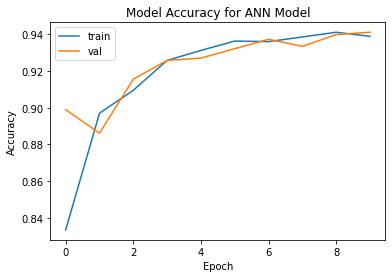

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for ANN Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

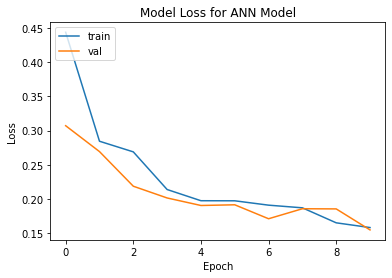

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for ANN Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

For ANN model,the training accuracy is almost same as than validation accuracy as epochs increase and training loss is almost same as than validation loss. This hints at overfitting and if we train for more epochs there is a chance training accuracy is higher than validation accuracy  and training loss is lower than validation loss which can lead to overfitting
So the model has to checked with reducing features, which will do after LSTM Model.

### LSTM Model

In [57]:
from tensorflow.keras.layers import Reshape

In [58]:
model_l = Sequential()
model_l.add(Reshape((1, l))) # l = X_train.shape[1] , which we have assigned in starting of ANN Model creation
model_l.add(LSTM(512, return_sequences=False, input_shape = (l,1),
               dropout=0.1, recurrent_dropout=0.1))
model_l.add(Dropout(0.4))
model_l.add(Dense(units=1, activation='sigmoid'))

In [59]:
model_l.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
history_l = model_l.fit(X_train,y_train, batch_size=32, epochs=10, validation_data = (X_val,y_val),callbacks=[es_callback])

Epoch 1/10
98/98 [==============================] - 7s 38ms/step - loss: 0.3537 - accuracy: 0.8769 - val_loss: 0.2522 - val_accuracy: 0.9156
Epoch 2/10
98/98 [==============================] - 3s 34ms/step - loss: 0.2271 - accuracy: 0.9198 - val_loss: 0.2046 - val_accuracy: 0.9309
Epoch 3/10
98/98 [==============================] - 3s 33ms/step - loss: 0.1997 - accuracy: 0.9281 - val_loss: 0.1924 - val_accuracy: 0.9335
Epoch 4/10
98/98 [==============================] - 3s 34ms/step - loss: 0.1893 - accuracy: 0.9309 - val_loss: 0.1852 - val_accuracy: 0.9373
Epoch 5/10
98/98 [==============================] - 3s 33ms/step - loss: 0.1807 - accuracy: 0.9300 - val_loss: 0.1711 - val_accuracy: 0.9373
Epoch 6/10
98/98 [==============================] - 3s 34ms/step - loss: 0.1704 - accuracy: 0.9386 - val_loss: 0.1704 - val_accuracy: 0.9309
Epoch 7/10
98/98 [==============================] - 3s 33ms/step - loss: 0.1692 - accuracy: 0.9361 - val_loss: 0.1701 - val_accuracy: 0.9348
Epoch 8/10
98

In [61]:
model_l.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 57)             0         
                                                                 
 lstm (LSTM)                 (None, 512)               1167360   
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,167,873
Trainable params: 1,167,873
Non-trainable params: 0
_________________________________________________________________


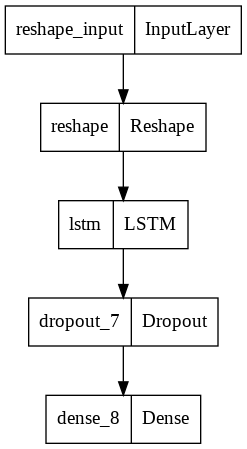

In [62]:
plot_model(model_l, to_file='model.png')

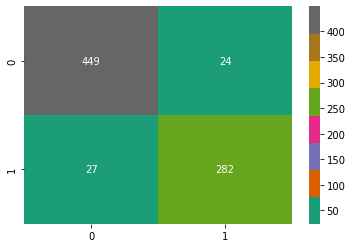

In [63]:
y_pred_l= model_l.predict(X_val).round()

cm = confusion_matrix(y_val, y_pred_l)
sns.heatmap(cm, annot=True, fmt='d', cmap='Dark2')
plt.show()

In [64]:
print(classification_report(y_val, y_pred_l))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       473
           1       0.92      0.91      0.92       309

    accuracy                           0.93       782
   macro avg       0.93      0.93      0.93       782
weighted avg       0.93      0.93      0.93       782



In [65]:
print('Accuracy of LSTM model is  : ', (metrics.accuracy_score(y_val, y_pred_l)))
print('Recall of LSTM is    : ', (metrics.recall_score(y_val, y_pred_l)))
print('Precision of LSTM is : ', (metrics.precision_score(y_val, y_pred_l)))

Accuracy of LSTM model is  :  0.9347826086956522
Recall of LSTM is    :  0.912621359223301
Precision of LSTM is :  0.9215686274509803


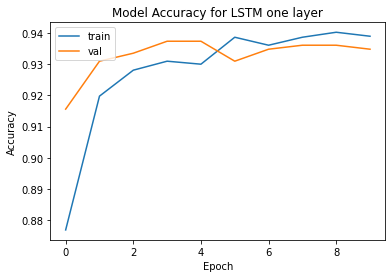

In [66]:
plt.plot(history_l.history['accuracy'])
plt.plot(history_l.history['val_accuracy'])
plt.title('Model Accuracy for LSTM one layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

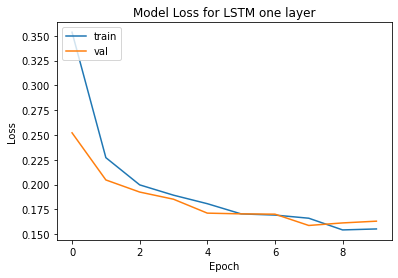

In [67]:
plt.plot(history_l.history['loss'])
plt.plot(history_l.history['val_loss'])
plt.title('Model Loss for LSTM one layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Here the training accuracy is higher than validation accuracy as epochs increase and training loss is lower than validation loss. This hints at overfitting and if we train for more epochs the gap should widen.

# Feature Reduction

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(X, y)

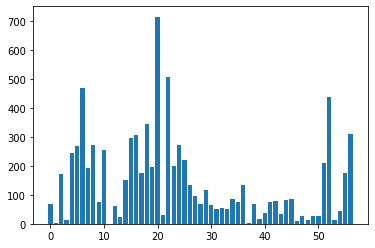

In [69]:
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.show()

In [70]:
vector_names = list(X.columns[selector.get_support(indices=True)])
vector_names

['X7', 'X9', 'X16', 'X17', 'X19', 'X21', 'X23', 'X25', 'X53', 'X57']

In [71]:
Feature_X_train = X_train[vector_names]
Feature_X_train.head()

,X7,X9,X16,X17,X19,X21,X23,X25,X53,X57
0,0.00,0.0,0.000000,0.00,-0.501916,-0.188976,0.0,0.0,0.000000,-0.400450
1,0.00,0.0,0.000000,2.53,0.467433,2.795276,0.0,0.0,8.796296,-0.121485
2,0.23,0.7,2.090909,0.70,0.582375,1.299213,0.0,0.0,2.000000,0.377953
3,0.00,0.0,0.000000,0.00,0.659004,-0.188976,0.0,0.0,0.000000,-0.301462
4,0.00,0.0,0.000000,0.00,-0.501916,-0.188976,0.0,0.0,0.000000,-0.377953


In [72]:
Feature_X_val = X_val[vector_names]
Feature_X_val.head()

,X7,X9,X16,X17,X19,X21,X23,X25,X53,X57
0,0.00,0.0,0.000000,0.08,-0.501916,-0.188976,0.00,0.08,0.000000,3.784027
1,0.00,0.0,0.000000,0.00,-0.501916,-0.188976,0.00,9.30,0.000000,-0.292463
2,0.68,0.0,12.363636,0.00,0.544061,1.425197,1.36,0.00,3.703704,0.193476
3,0.00,0.0,0.000000,0.00,0.180077,0.511811,0.00,0.00,0.000000,-0.256468
4,0.00,0.0,0.000000,0.00,1.279693,-0.188976,0.00,0.00,14.129630,-0.314961


In [73]:
l_new = Feature_X_train.shape[1]
l_new

10

## New ANN Model

In [74]:
model_2 =  Sequential()

model_2.add(Dense(units=l, activation='relu', input_shape = (l_new,)))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1, activation='sigmoid'))



model_2.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [75]:
history_2f = model_2.fit(Feature_X_train,y_train, batch_size=32, epochs=10, validation_split = 0.2)

Epoch 1/10
79/79 [==============================] - 2s 20ms/step - loss: 0.4526 - accuracy: 0.8221 - val_loss: 0.3074 - val_accuracy: 0.8770
Epoch 2/10
79/79 [==============================] - 1s 18ms/step - loss: 0.3527 - accuracy: 0.8649 - val_loss: 0.2891 - val_accuracy: 0.8946
Epoch 3/10
79/79 [==============================] - 1s 17ms/step - loss: 0.3143 - accuracy: 0.8893 - val_loss: 0.2676 - val_accuracy: 0.8962
Epoch 4/10
79/79 [==============================] - 1s 17ms/step - loss: 0.3086 - accuracy: 0.8829 - val_loss: 0.2502 - val_accuracy: 0.9026
Epoch 5/10
79/79 [==============================] - 1s 17ms/step - loss: 0.3040 - accuracy: 0.8829 - val_loss: 0.2861 - val_accuracy: 0.8978
Epoch 6/10
79/79 [==============================] - 1s 17ms/step - loss: 0.2919 - accuracy: 0.8917 - val_loss: 0.2587 - val_accuracy: 0.8946
Epoch 7/10
79/79 [==============================] - 1s 17ms/step - loss: 0.2904 - accuracy: 0.8977 - val_loss: 0.2443 - val_accuracy: 0.9058
Epoch 8/10
79

In [76]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 57)                627       
                                                                 
 dropout_8 (Dropout)         (None, 57)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               7424      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               66048     
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)              

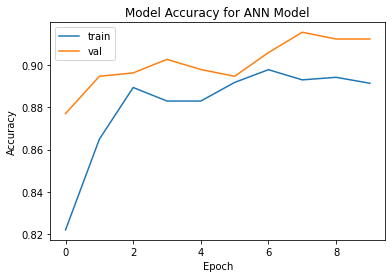

In [77]:
plt.plot(history_2f.history['accuracy'])
plt.plot(history_2f.history['val_accuracy'])
plt.title('Model Accuracy for ANN Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

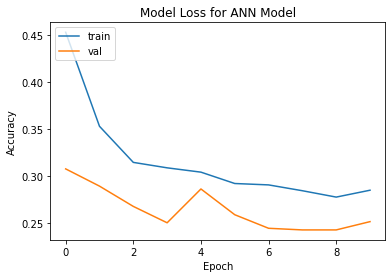

In [78]:
plt.plot(history_2f.history['loss'])
plt.plot(history_2f.history['val_loss'])
plt.title('Model Loss for ANN Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Now for  ANN model,the training accuracy is lower than validation accuracy as increase and training loss is higher than validation loss. So now there is no overfitting in ANN Model. 

In [79]:
y_pred_2= model_2.predict(Feature_X_val).round()

In [80]:
print('Accuracy of New ANN model is  : ', (metrics.accuracy_score(y_val, y_pred_2)))
print('Recall of New ANN is    : ', (metrics.recall_score(y_val, y_pred_2)))
print('Precision of New ANN is : ', (metrics.precision_score(y_val, y_pred_2)))

Accuracy of New ANN model is  :  0.9040920716112532
Recall of New ANN is    :  0.8770226537216829
Precision of New ANN is :  0.8798701298701299


Now we can check for LSTM

## LSTM Model with reduced Feature

In [81]:
model_l_new = Sequential()
model_l_new.add(Reshape((1, l_new))) # l_new = Feature_X_train.shape[1]
model_l_new.add(LSTM(512, return_sequences=False, input_shape = (l_new,1),
               dropout=0.1, recurrent_dropout=0.1))
model_l_new.add(Dropout(0.4))
model_l_new.add(Dense(units=1, activation='sigmoid'))

model_l_new.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [82]:
history_new = model_l_new.fit(Feature_X_train,y_train, batch_size=32, epochs=10, validation_split = 0.2,callbacks=[es_callback])

Epoch 1/10
79/79 [==============================] - 6s 39ms/step - loss: 0.4937 - accuracy: 0.8497 - val_loss: 0.3671 - val_accuracy: 0.8818
Epoch 2/10
79/79 [==============================] - 3s 33ms/step - loss: 0.3439 - accuracy: 0.8721 - val_loss: 0.3019 - val_accuracy: 0.8674
Epoch 3/10
79/79 [==============================] - 3s 33ms/step - loss: 0.3065 - accuracy: 0.8793 - val_loss: 0.2800 - val_accuracy: 0.8834
Epoch 4/10
79/79 [==============================] - 3s 33ms/step - loss: 0.3041 - accuracy: 0.8765 - val_loss: 0.2794 - val_accuracy: 0.8818
Epoch 5/10
79/79 [==============================] - 3s 33ms/step - loss: 0.2996 - accuracy: 0.8817 - val_loss: 0.2599 - val_accuracy: 0.8930
Epoch 6/10
79/79 [==============================] - 3s 33ms/step - loss: 0.2807 - accuracy: 0.8865 - val_loss: 0.2662 - val_accuracy: 0.8866
Epoch 7/10
79/79 [==============================] - 3s 33ms/step - loss: 0.2877 - accuracy: 0.8845 - val_loss: 0.2556 - val_accuracy: 0.9026
Epoch 8/10
79

In [83]:
model_l_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 1, 10)             0         
                                                                 
 lstm_1 (LSTM)               (None, 512)               1071104   
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1,071,617
Trainable params: 1,071,617
Non-trainable params: 0
_________________________________________________________________


In [84]:
y_pred_new= model_l_new.predict(Feature_X_val).round()

In [85]:
print('Accuracy of LSTM model is  : ', (metrics.accuracy_score(y_val, y_pred_new)))
print('Recall of LSTM is    : ', (metrics.recall_score(y_val, y_pred_new)))
print('Precision of LSTM is : ', (metrics.precision_score(y_val, y_pred_new)))

Accuracy of LSTM model is  :  0.9028132992327366
Recall of LSTM is    :  0.8349514563106796
Precision of LSTM is :  0.911660777385159


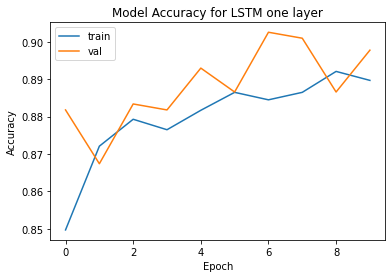

In [86]:
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('Model Accuracy for LSTM one layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

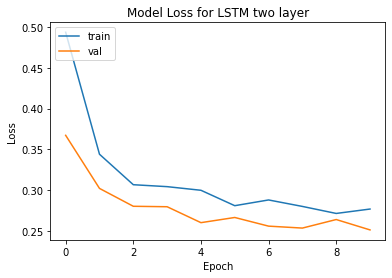

In [87]:
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('Model Loss for LSTM two layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Here, the training accuracy is getting lower than validation accuracy as epoch increases and training loss is higher than validation loss. 

Even though overfitting is not there but still overall performance of NN is less than Random forest. 

Best Model for Prediction here is Random Forest it is in par with the fact that RF works well with high dimensional data and NN are best for unstructured data.

# Test Data Analysis

In [88]:
df_test.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.7,0.0,0.70,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2.83,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.0,2.342,47,89
1,0.0,0.0,0.84,0.0,0.84,0.0,0.84,0.0,0.0,0.0,0.0,0.0,0.84,0.0,0.0,0.0,0.0,0.0,2.54,0.0,1.69,0.0,0.0,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.0,10.375,168,249


## Unique Values in Test Features

In [89]:
for col in df_test.columns:
  print(df_test[col].value_counts())

0.00    531
0.05      7
0.10      7
0.11      6
0.08      6
       ... 
1.02      1
0.70      1
0.29      1
1.47      1
0.80      1
Name: X1, Length: 74, dtype: int64
0.00     557
14.28      7
0.08       5
0.44       4
0.49       4
        ... 
4.54       1
0.01       1
1.05       1
3.05       1
0.34       1
Name: X2, Length: 73, dtype: int64
0.00    424
0.48      7
0.23      6
0.55      6
0.18      6
       ... 
1.26      1
1.31      1
1.98      1
1.34      1
1.04      1
Name: X3, Length: 126, dtype: int64
0.00     683
0.21       2
1.29       1
1.33       1
0.52       1
0.13       1
35.46      1
19.16      1
Name: X4, dtype: int64
0.00    439
0.47      5
0.87      5
0.20      5
0.34      5
       ... 
0.15      1
0.96      1
0.31      1
1.22      1
0.04      1
Name: X5, Length: 142, dtype: int64
0.00    552
0.08      7
0.29      5
0.19      5
0.36      4
       ... 
1.10      1
2.43      1
1.27      1
0.15      1
1.61      1
Name: X6, Length: 72, dtype: int64
0.00    568
0.08      6
0

## Visualization of Features

For test data also we can visualize the features using histogram and then by boxen plot.

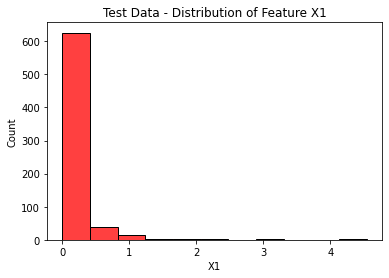

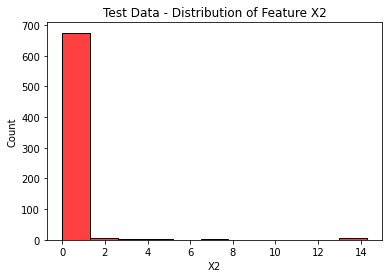

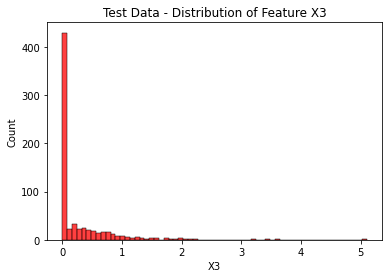

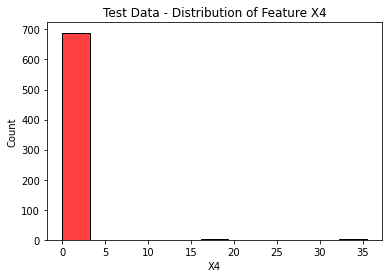

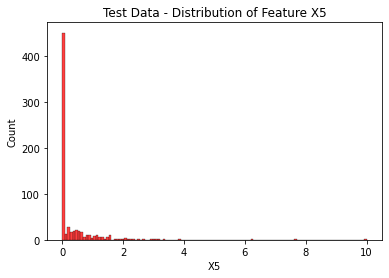

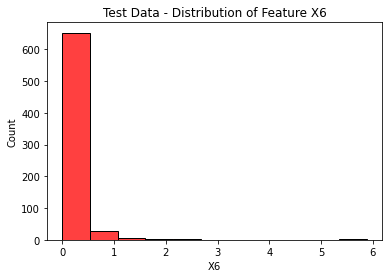

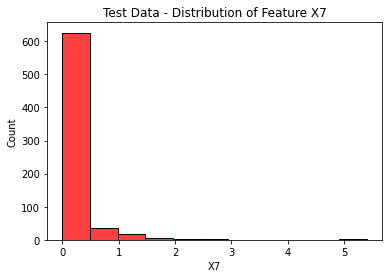

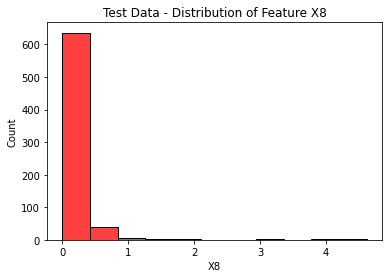

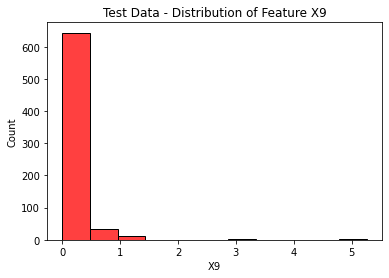

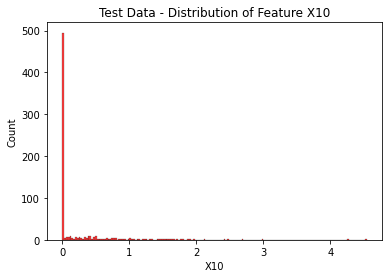

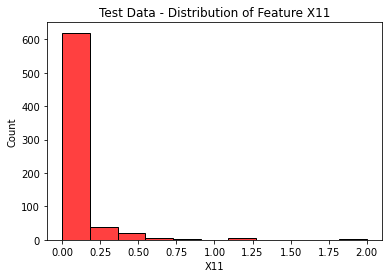

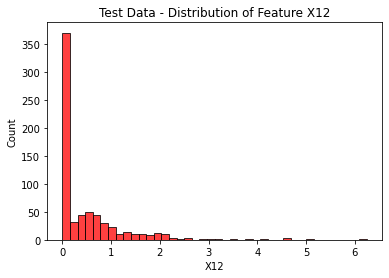

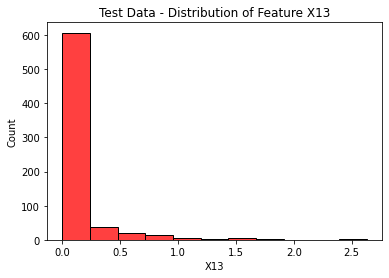

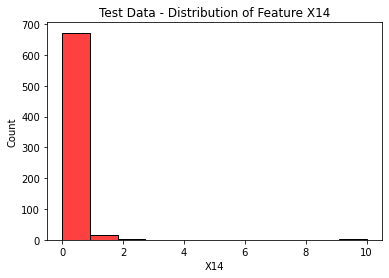

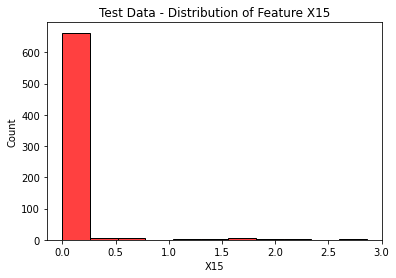

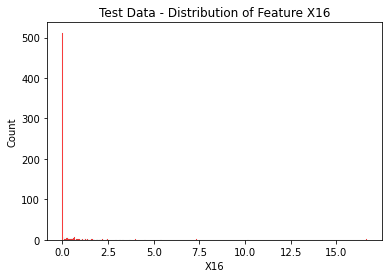

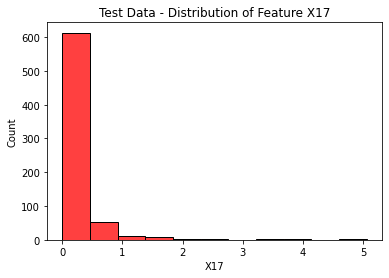

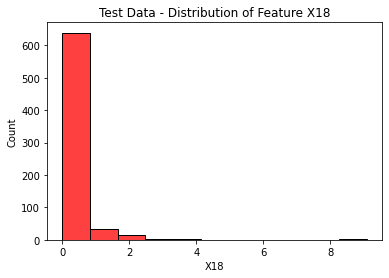

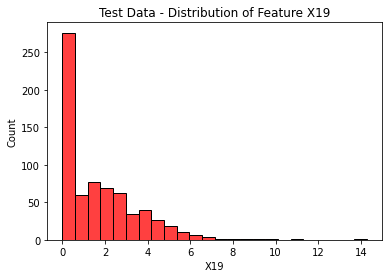

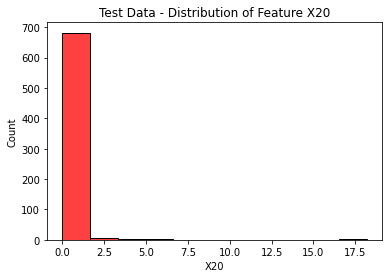

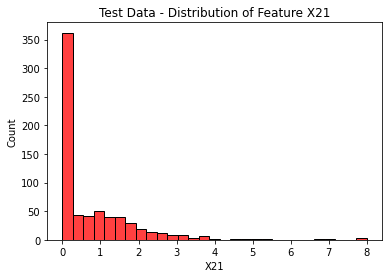

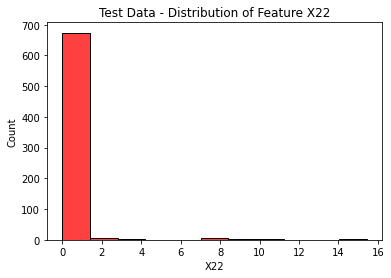

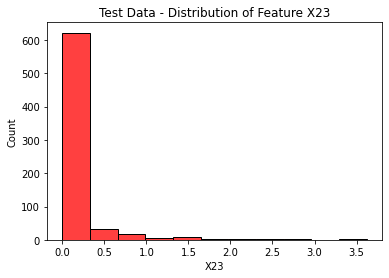

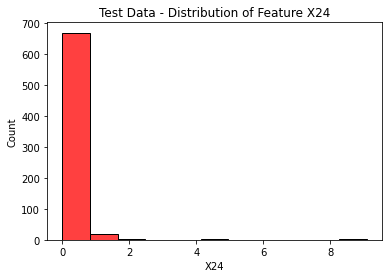

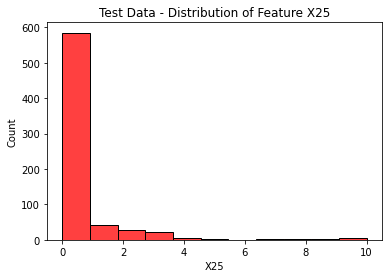

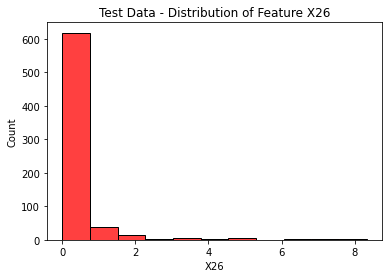

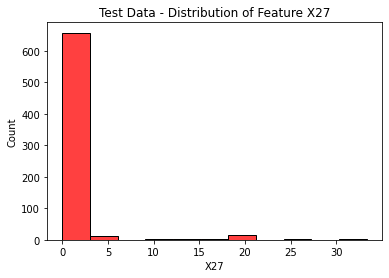

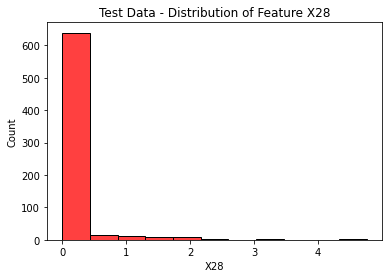

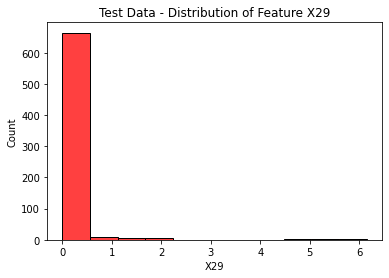

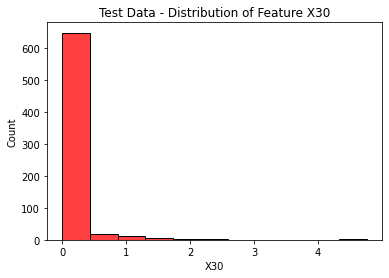

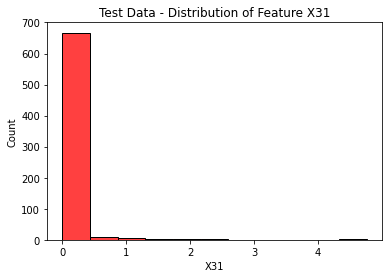

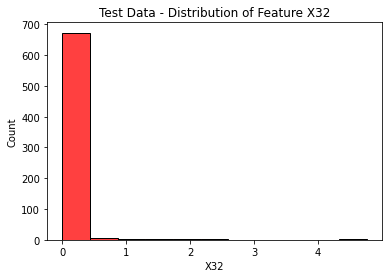

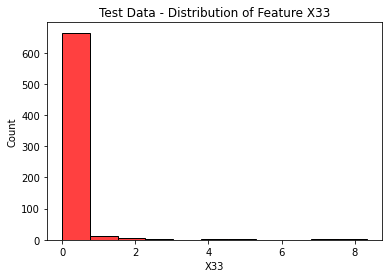

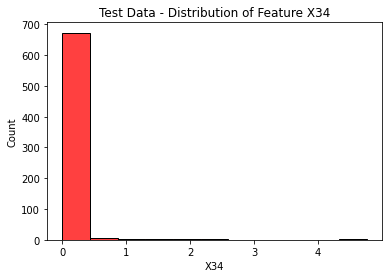

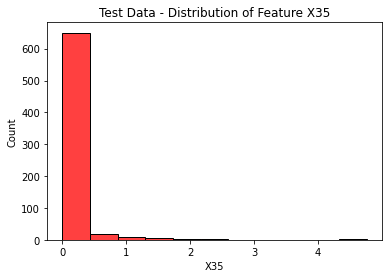

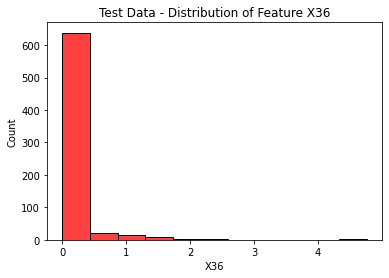

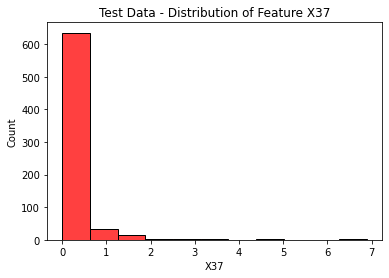

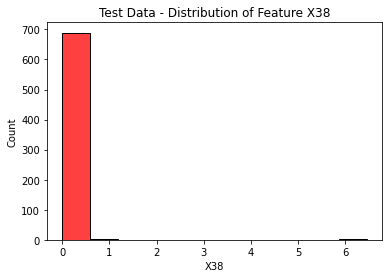

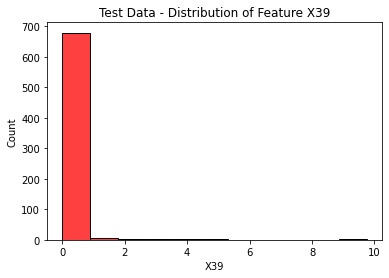

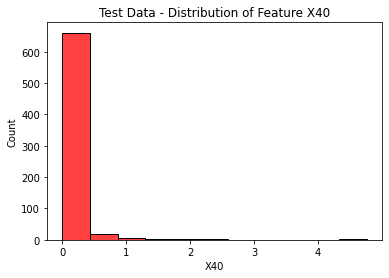

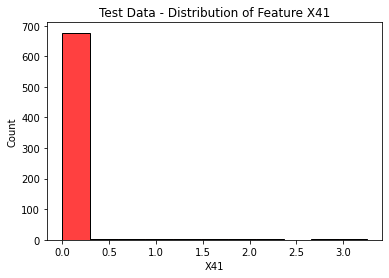

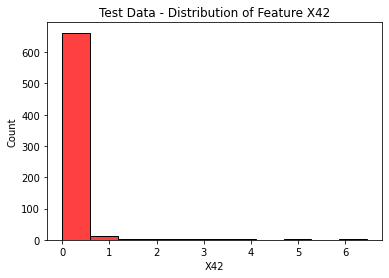

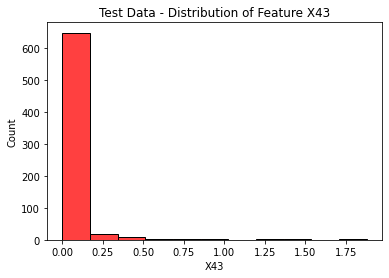

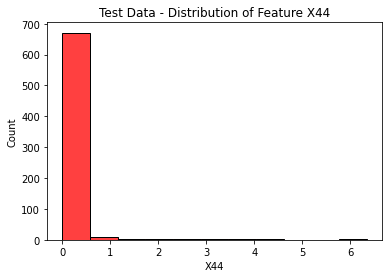

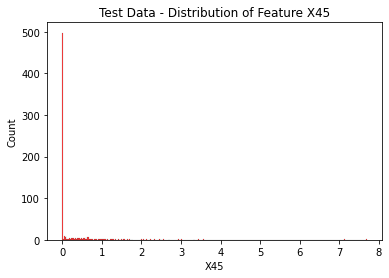

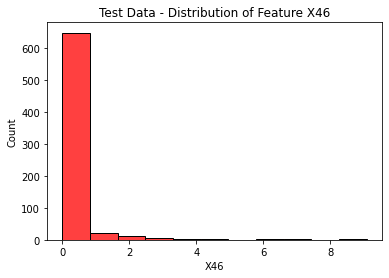

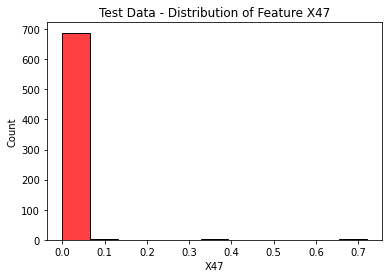

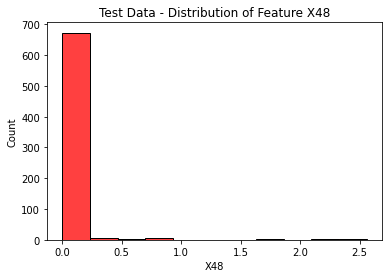

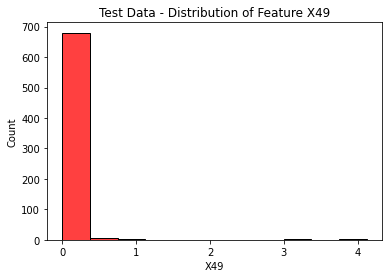

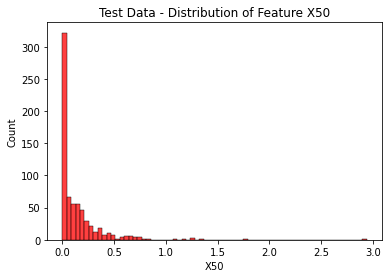

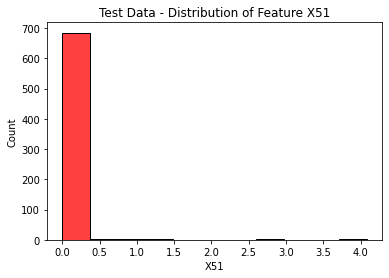

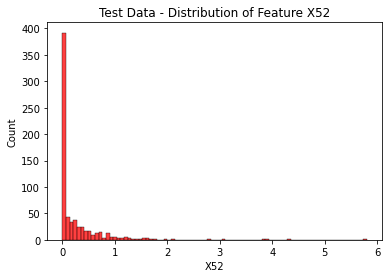

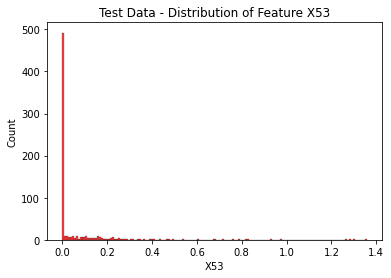

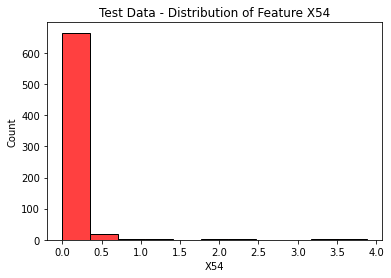

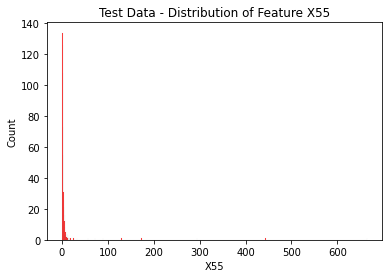

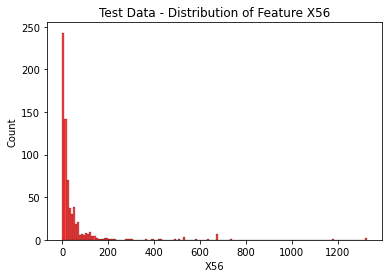

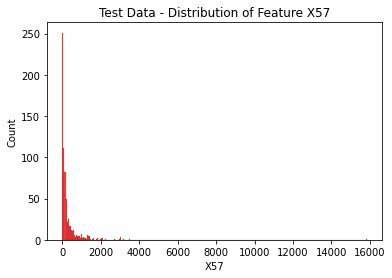

In [90]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
for i, col in enumerate(df_test.columns):
    plt.figure(i)
    sns.histplot(df_test[col],color = 'red')
    My_Title = "Test Data - Distribution of Feature " + df_test.columns[i]
    plt.title(My_Title)

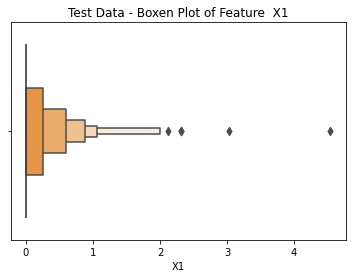

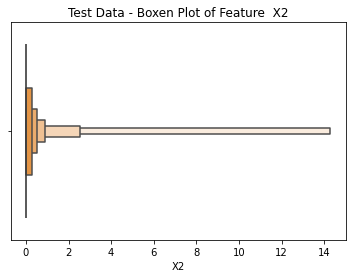

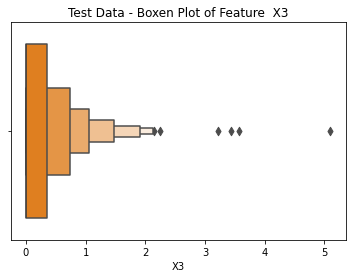

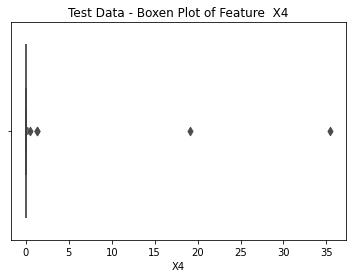

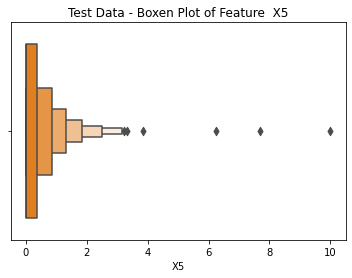

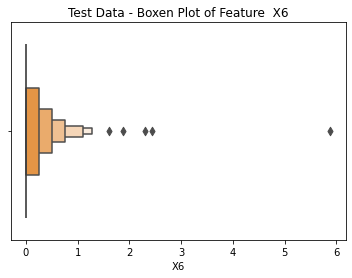

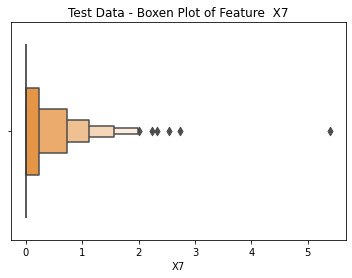

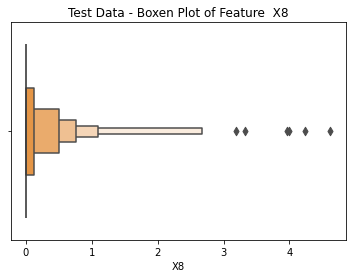

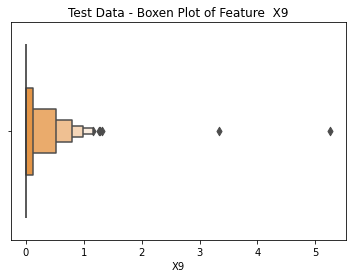

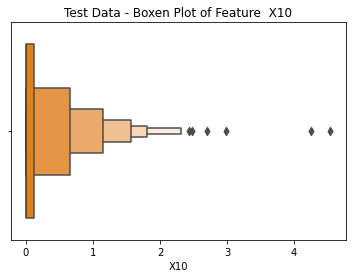

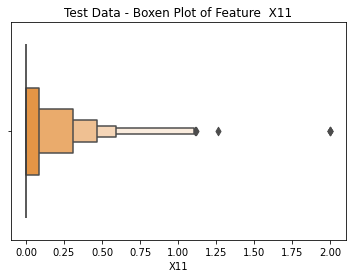

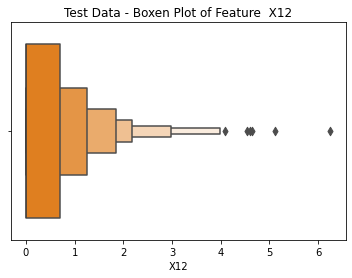

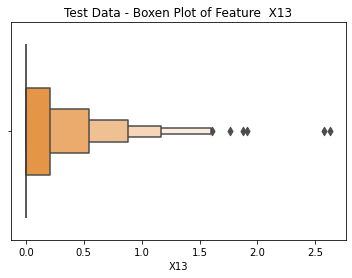

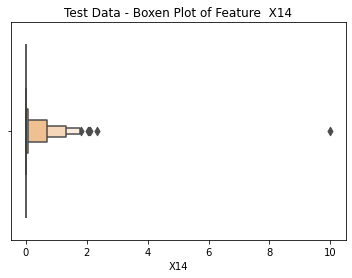

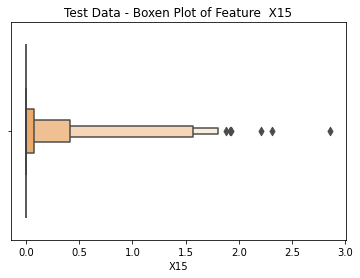

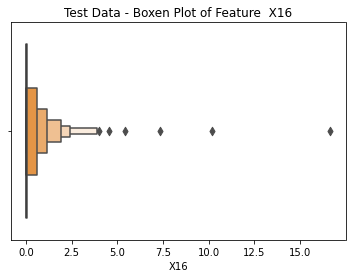

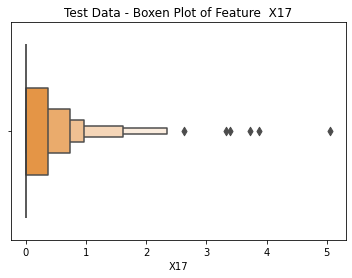

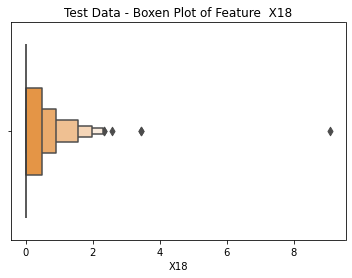

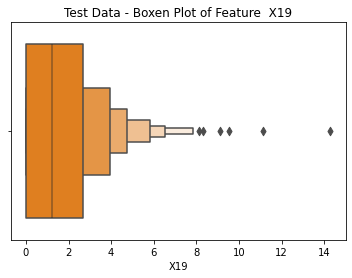

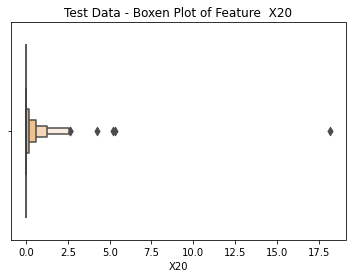

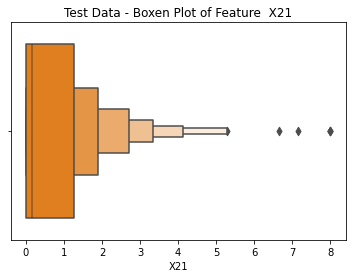

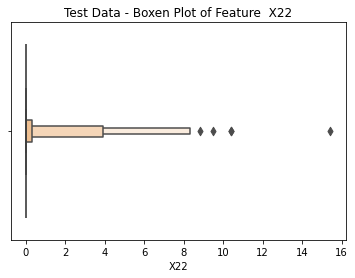

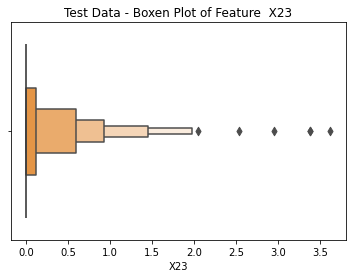

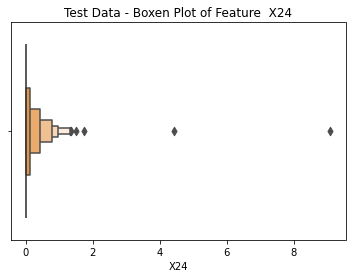

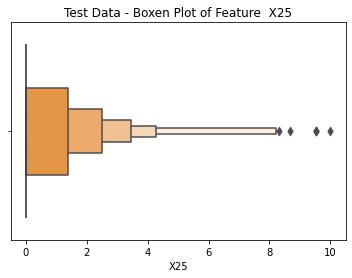

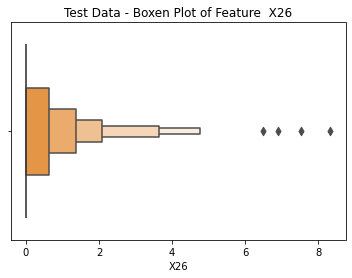

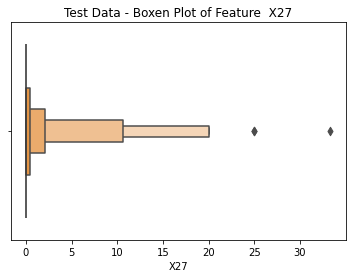

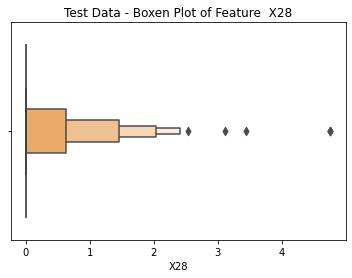

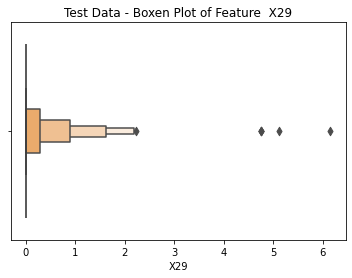

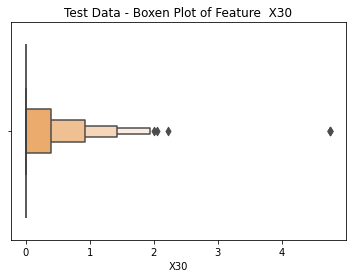

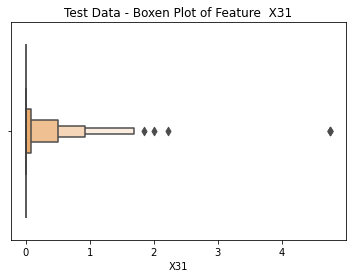

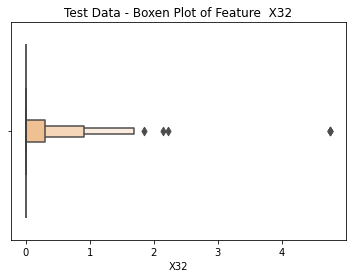

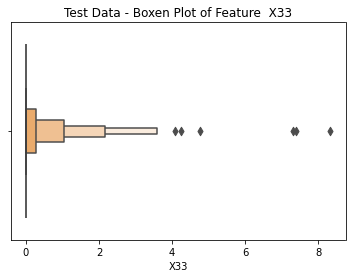

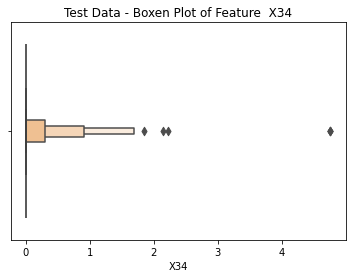

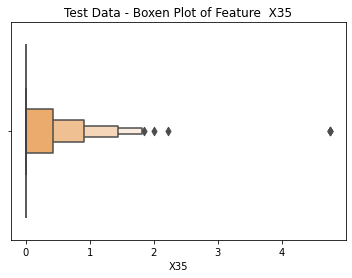

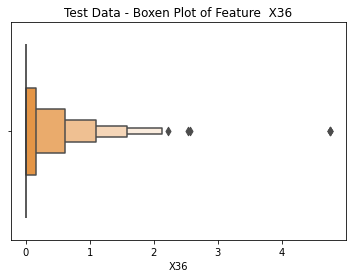

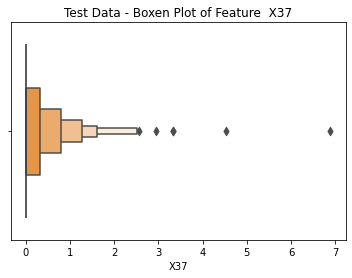

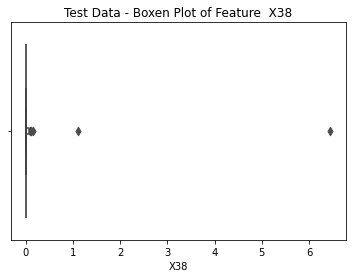

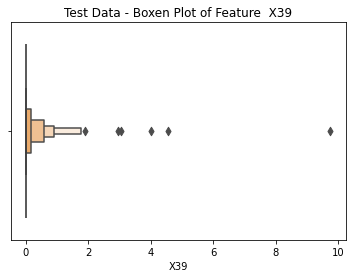

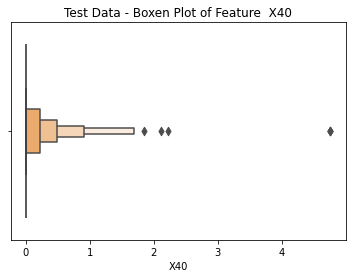

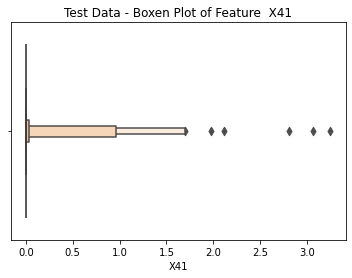

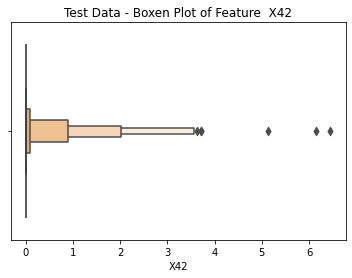

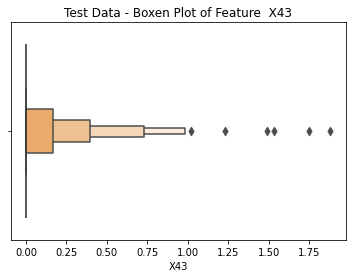

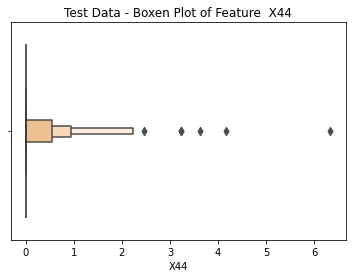

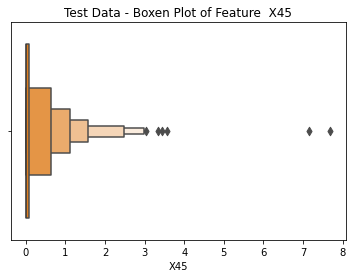

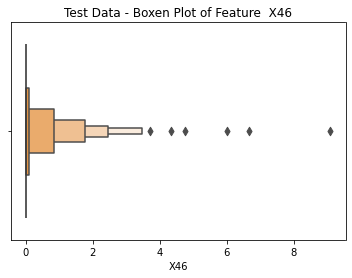

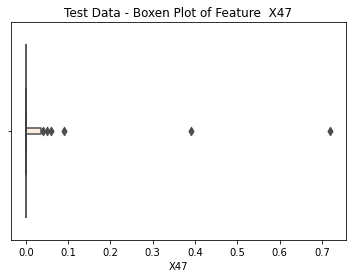

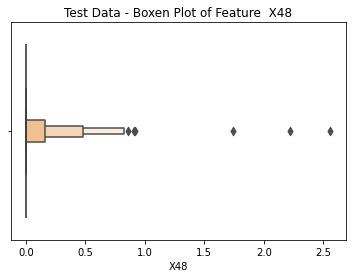

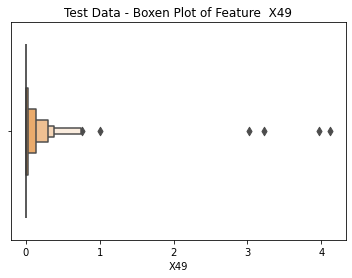

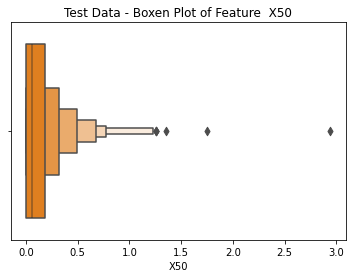

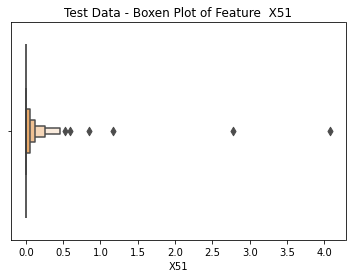

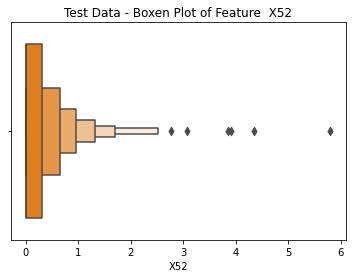

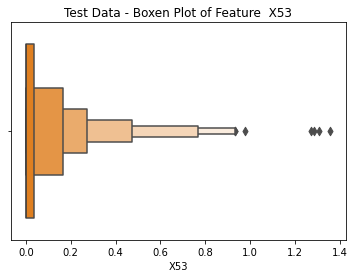

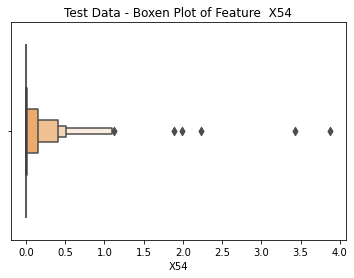

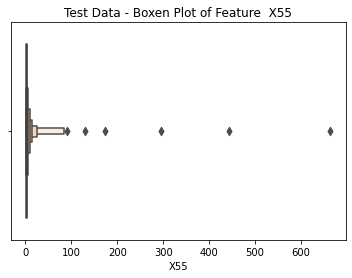

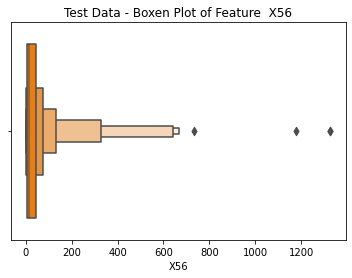

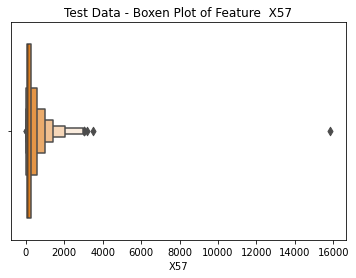

In [91]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

for i, col in enumerate(df_test.columns):
    plt.figure(i)
    My_Title = "Test Data - Boxen Plot of Feature  " + df_test.columns[i]
    sns.boxenplot(x= df_test[col],palette ='autumn_r')
    plt.title(My_Title)

## Outliers detection using IQR method

In [92]:
for i, col in enumerate(df_test.columns):
    len_col = outliers_iqr(df_test[col])
    output = "Number of Outliers in Feature  " + df_test.columns[i] + " is : " 
    print(output, len_col,'\n')

Number of Outliers in Feature  X1 is :  160 

Number of Outliers in Feature  X2 is :  134 

Number of Outliers in Feature  X3 is :  59 

Number of Outliers in Feature  X4 is :  8 

Number of Outliers in Feature  X5 is :  77 

Number of Outliers in Feature  X6 is :  139 

Number of Outliers in Feature  X7 is :  123 

Number of Outliers in Feature  X8 is :  109 

Number of Outliers in Feature  X9 is :  110 

Number of Outliers in Feature  X10 is :  139 

Number of Outliers in Feature  X11 is :  101 

Number of Outliers in Feature  X12 is :  50 

Number of Outliers in Feature  X13 is :  125 

Number of Outliers in Feature  X14 is :  50 

Number of Outliers in Feature  X15 is :  54 

Number of Outliers in Feature  X16 is :  152 

Number of Outliers in Feature  X17 is :  139 

Number of Outliers in Feature  X18 is :  154 

Number of Outliers in Feature  X19 is :  10 

Number of Outliers in Feature  X20 is :  60 

Number of Outliers in Feature  X21 is :  29 

Number of Outliers in Feature  X

## Feature Scaling of Test Data Set

Here we will be using only the transform() method applied to scale the data. As we have already one fit() method on our training set.

In [93]:
df_test = scaler.transform(df_test)

df_test = pd.DataFrame(df_test,columns=cols)

## Prediction With Random Forest

In [94]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.0,0.00,0.000000,0.0,0.000000,0.00,0.00,0.00,0.00,0.0000,0.0,-0.129231,0.00,0.00,0.00,0.000000,0.00,0.00,-0.501916,0.0,-0.188976,0.0,0.00,0.00,0.00,0.00,20.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,-0.350785,0.0,0.000000,0.000000,0.00,-0.615902,-0.378378,-0.400450
1,0.0,0.00,2.930233,0.0,0.000000,0.00,0.00,0.00,0.00,0.0000,0.0,-0.129231,1.26,0.00,0.00,0.000000,2.53,5.06,0.467433,0.0,2.795276,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,-0.350785,0.0,5.823755,8.796296,0.00,-0.249339,-0.108108,-0.121485
2,0.0,0.23,1.093023,0.0,3.084967,0.00,0.23,0.00,0.70,4.3750,0.0,0.449231,0.23,0.00,0.00,2.090909,0.70,0.00,0.582375,0.0,1.299213,0.0,0.00,0.47,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,-0.350785,0.0,0.220690,2.000000,0.00,0.074946,0.135135,0.377953
3,0.0,0.00,0.000000,0.0,0.000000,0.00,0.00,0.00,0.00,0.0000,0.0,3.600000,0.00,0.00,0.00,0.000000,0.00,0.00,0.659004,0.0,-0.188976,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,-0.350785,0.0,1.449808,0.000000,0.00,-0.285852,-0.270270,-0.301462
4,0.0,0.00,0.000000,0.0,0.000000,0.00,0.00,5.88,0.00,0.0000,0.0,-0.129231,0.00,0.00,0.00,0.000000,0.00,0.00,-0.501916,0.0,-0.188976,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,-0.350785,0.0,0.000000,0.000000,0.00,-0.615902,-0.378378,-0.377953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,0.0,0.00,0.000000,0.0,0.000000,0.00,0.00,0.00,0.00,5.2500,0.0,0.904615,0.00,0.00,0.00,0.000000,0.00,0.00,0.471264,0.0,1.141732,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,1.69,0.0,0.0,0.0,0.350785,0.0,0.000000,0.000000,0.00,-0.478982,-0.270270,-0.301462
3124,0.0,0.00,0.000000,0.0,0.000000,0.00,0.00,0.00,0.00,0.0000,0.0,-0.129231,0.91,0.00,0.00,0.000000,0.00,0.00,-0.153257,0.0,-0.188976,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.397906,0.0,1.756322,0.000000,0.00,0.289215,0.081081,-0.085489
3125,0.0,0.00,0.000000,0.0,7.450980,0.00,0.00,0.00,0.00,0.0000,0.0,-0.129231,0.00,2.85,0.00,0.000000,0.00,2.85,-0.501916,0.0,2.055118,0.0,0.00,0.00,0.00,0.00,2.85,0.0,0.0,0.00,0.0,0.0,2.85,0.0,0.0,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,31.666667,0.00,0.0,0.0,0.0,-0.350785,0.0,0.000000,0.000000,0.00,0.729282,0.378378,-0.251969
3126,0.5,0.40,0.767442,0.0,0.339869,0.03,0.13,0.10,0.54,4.8125,0.3,0.732308,0.54,1.14,0.03,2.454545,0.43,0.03,0.724138,0.0,0.952756,0.0,0.37,0.60,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.666667,0.00,0.0,0.0,0.0,0.020942,0.0,1.397701,9.259259,0.11,1.809753,3.081081,9.565804


In [95]:
rfc =  RandomForestClassifier(n_estimators=100, random_state=52,oob_score = True)
pred_test =rfc.fit(X_train.values, y_train.values).predict(df_test.values)

In [96]:
pred_test

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

## Feature Scores of features.

In [97]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

X52    0.123947
X53    0.098171
X7     0.073360
X21    0.071710
X16    0.063695
X55    0.059768
X56    0.051563
X57    0.045675
X25    0.041016
X24    0.036361
X19    0.035076
X5     0.028499
X23    0.025974
X17    0.018733
X27    0.018380
X26    0.016669
X46    0.013873
X50    0.012609
X12    0.011318
X10    0.010826
X11    0.010603
X37    0.010506
X8     0.010382
X3     0.009656
X45    0.009027
X18    0.008262
X6     0.006540
X28    0.006341
X42    0.005836
X39    0.004560
X2     0.004481
X30    0.004462
X49    0.004295
X9     0.004036
X13    0.003669
X35    0.003263
X1     0.003240
X20    0.003215
X36    0.003150
X54    0.003118
X33    0.002713
X14    0.002670
X51    0.002475
X44    0.002327
X22    0.001855
X31    0.001684
X29    0.001487
X41    0.001321
X48    0.001165
X40    0.001081
X43    0.001029
X15    0.001005
X34    0.000947
X4     0.000940
X32    0.000676
X38    0.000451
X47    0.000312
dtype: float64

# Submission

In [98]:
coln = ['Target']
submission = pd.DataFrame(pred_test, columns= coln)
submission.to_csv('submission.csv') 

In [99]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>